# Share Bike Case Study

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
<br/>
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 0: Importing important libraries

In [141]:
# for EDA, Data Reading and Data Visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for feature selection and LinearRegression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for model building and VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for Handling warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Dataset

- In this step we will load th data and read the data.
- For understanding the data we used info, describe and shape.

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.shape

(730, 16)

## Step 2: Deleting Irrelevent Column

- We are deleting **instant** variable here which is basically working as a serial number in this data.
- Also **dteday** is a date column and deleting this because already some date related variables like **year, month, weekday.**
- Deleting **casual and registered** feature as well because the total count is added in our target variable **cnt.**

In [6]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Data Qulity Checks

### 3.1 Missing Value checks

In [7]:
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

We can see that there is no missing value present in the dataset which is a indication of good quality data collection

### 3.2 Duplicate Data Checks

In [8]:
df_duplicates = df
df_duplicates.drop_duplicates(inplace=True)

In [9]:
df_duplicates.shape

(730, 12)

In [10]:
df.shape

(730, 12)

After deleting the duplicate value we compared the shape with original one (where unnecessary columns are deleted).
And it looks like there was no duplicate data.

### 3.3 Checking for junk values

In [11]:
for i in df:
    print(df[i].value_counts(ascending=False), '\n\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64 



61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333  

There is no Junk data as in the original dataset.

## Step 4: Data Visualization

- Now, we will proceed with Data Visualization which will contain **Univariate analysis, Bivariate analysis and Multivariate analysis**
- Before, Data Visualization we will seperate each variables as **Numerical and Categorical**

### 4.1 Separating numeric and categorical columns.

In [12]:
num_col = ['temp','atemp','hum','windspeed','cnt']
cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

### 4.2 Univariate Analysis

#### 4.2.1 Univariate analysis for numeric Columns

In [13]:
def univariate_num_col(var):
    plt.figure(figsize=(20,5))
    sns.histplot(data=df,x=var,bins="auto", color='purple')
    plt.title('Distribution of '+var)
    plt.xlabel(var, fontdict={'size':15})
    plt.ylabel('Count', fontdict={'size':15})
    plt.xticks(rotation=90)
    plt.show()

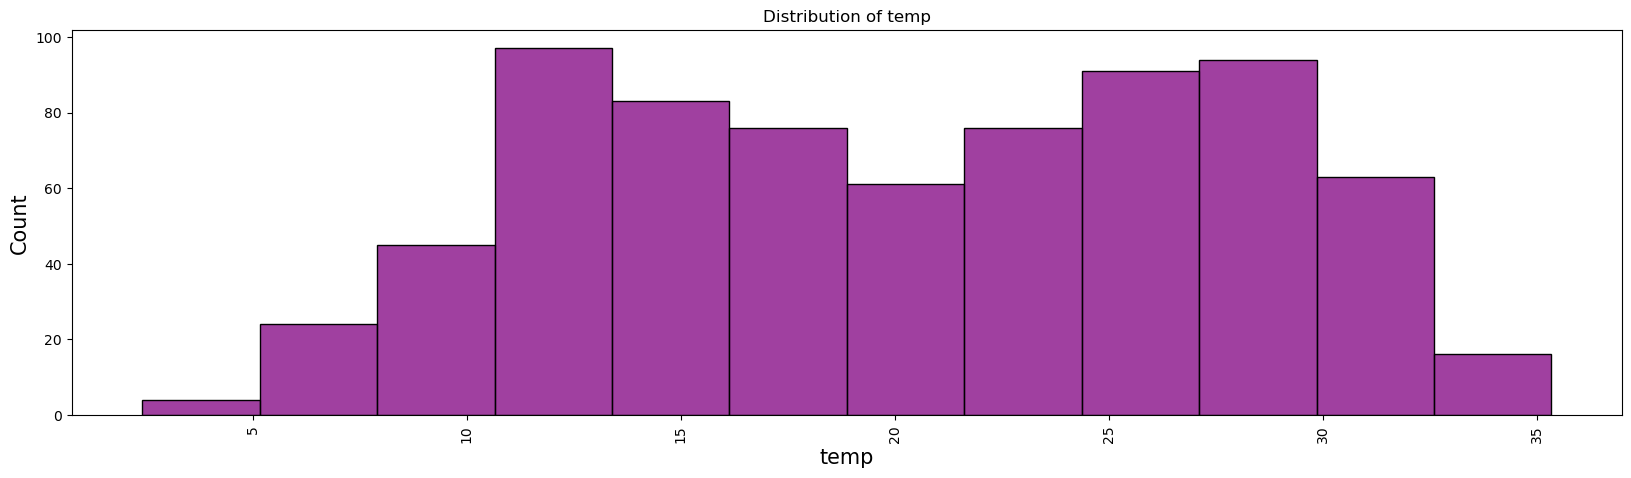

In [14]:
univariate_num_col('temp')

Here Highest temperature was between 10C to 15C

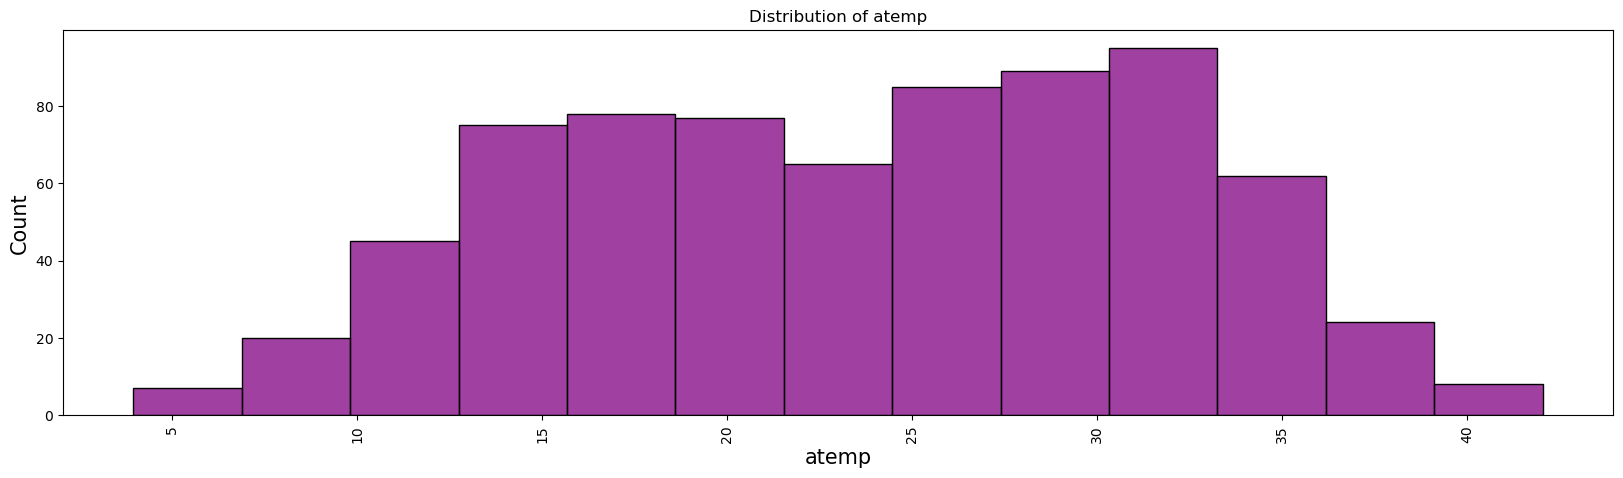

In [15]:
univariate_num_col('atemp')

Feeling temperature / atemp was between 30C to 33C

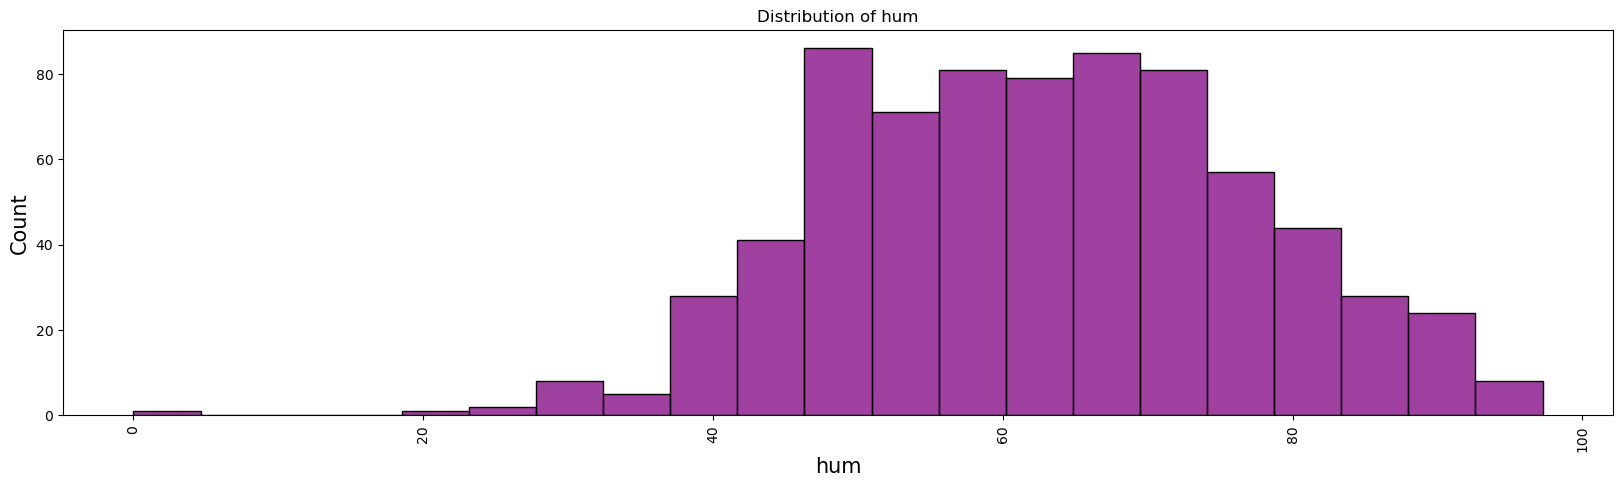

In [16]:
univariate_num_col('hum')

Highes humidity was between 45 to 50

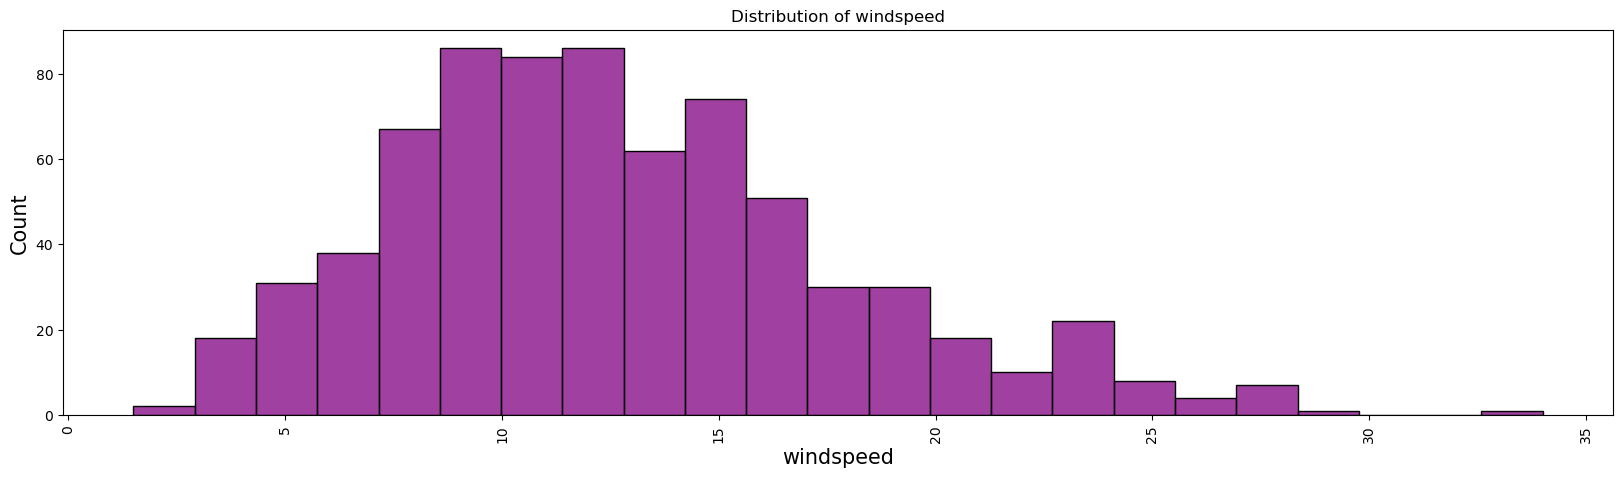

In [17]:
univariate_num_col('windspeed')

Highest wind speed distribution was between 8.5 to 11

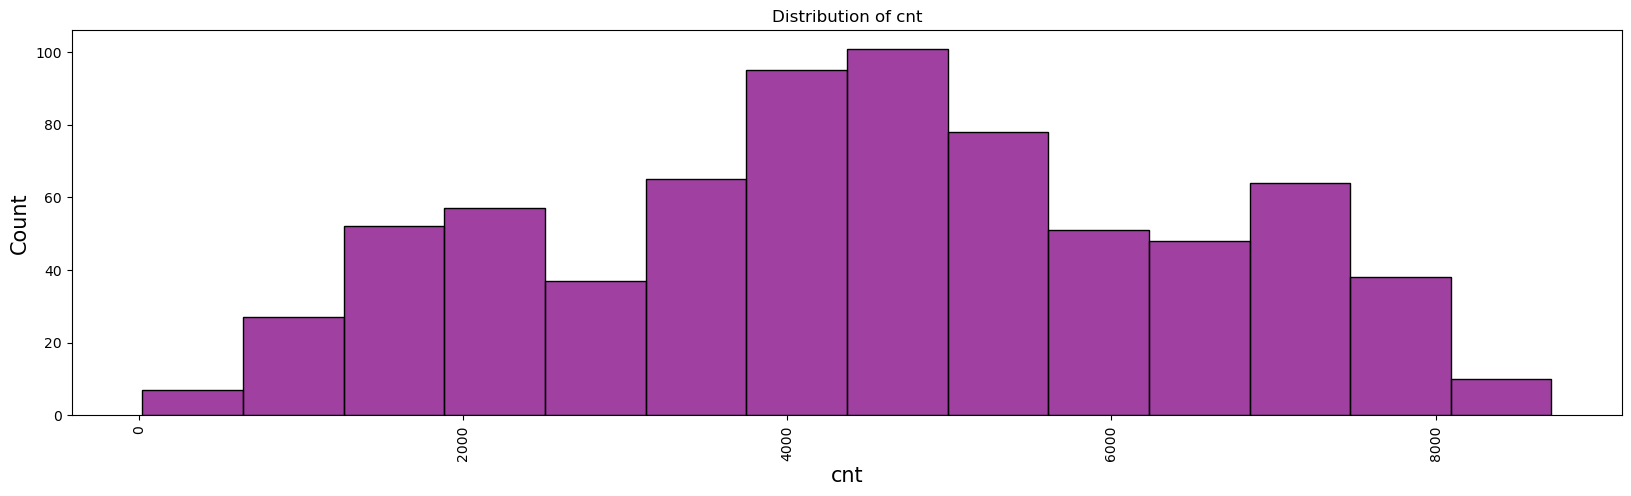

In [18]:
univariate_num_col('cnt')

Highest Distribution of Count variable was between approximately 4000 to 5000.

#### 4.2.2 Univariate analysis for categorical Columns

In [19]:
def univariate_cat_col(var):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=var)
    plt.title('Distribution of '+var)
    plt.xlabel(var, fontdict={'size':15})
    plt.ylabel('Count', fontdict={'size':15})
    plt.xticks(rotation=90)
    plt.show()

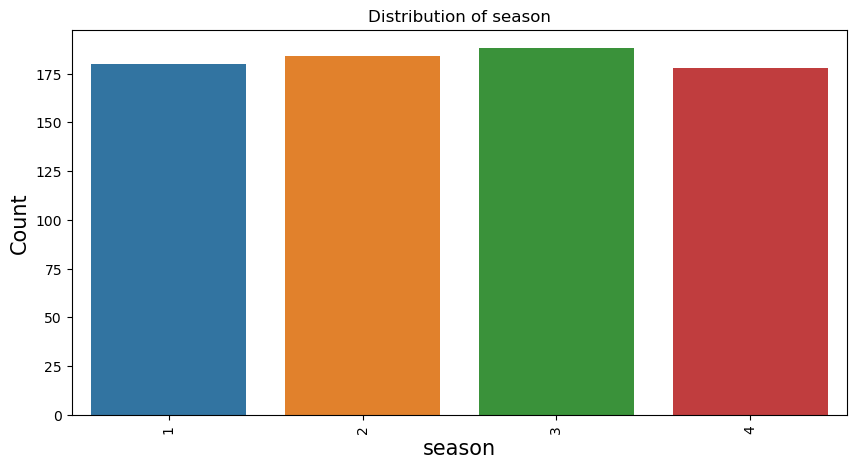

In [20]:
univariate_cat_col('season')

count for all season seems like similar

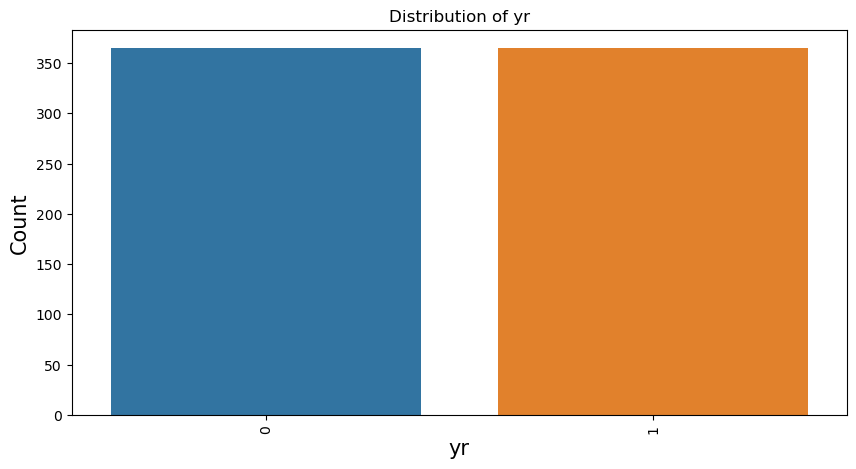

In [21]:
univariate_cat_col('yr')

both 2018 and 2019 are having almost same count

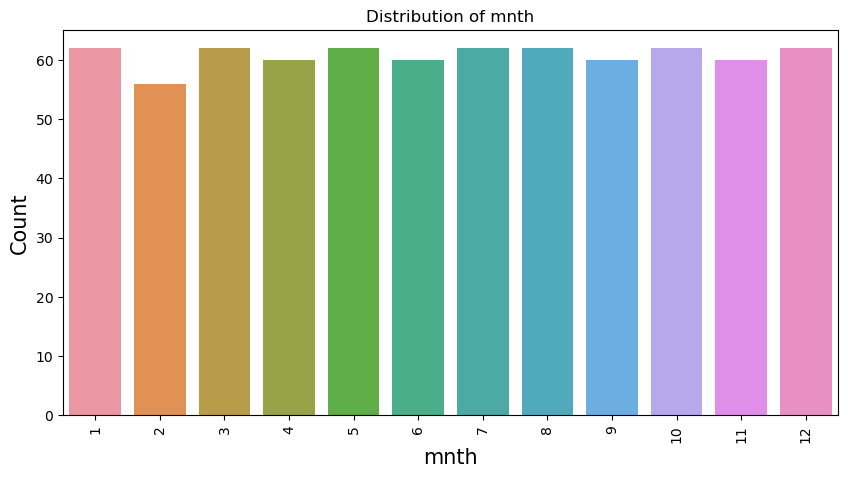

In [22]:
univariate_cat_col('mnth')

count for January, March, May, July, August, October and December are bit higher than other mnths.

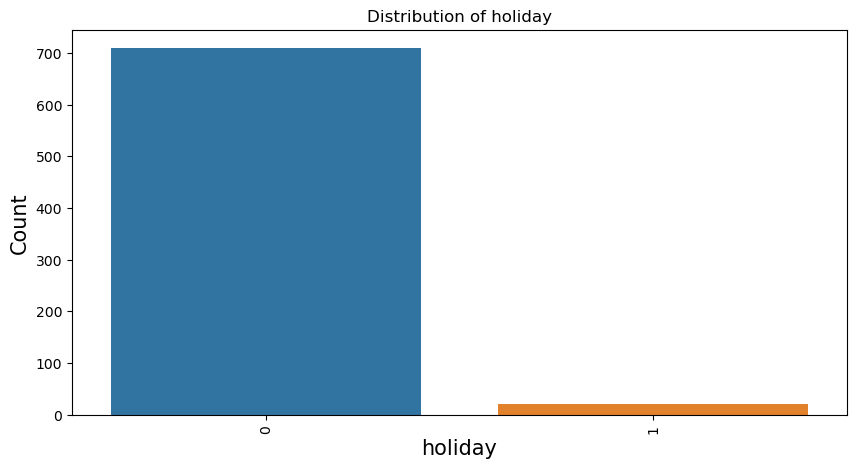

In [23]:
univariate_cat_col('holiday')

Numbers of Holidays are excessively low

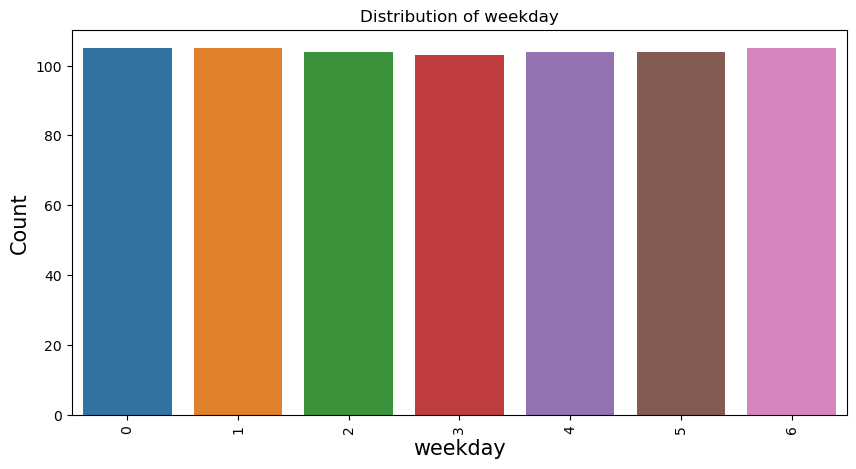

In [24]:
univariate_cat_col('weekday')

Count of all weekdays are also same. 

univariate_cat_col('workingday')

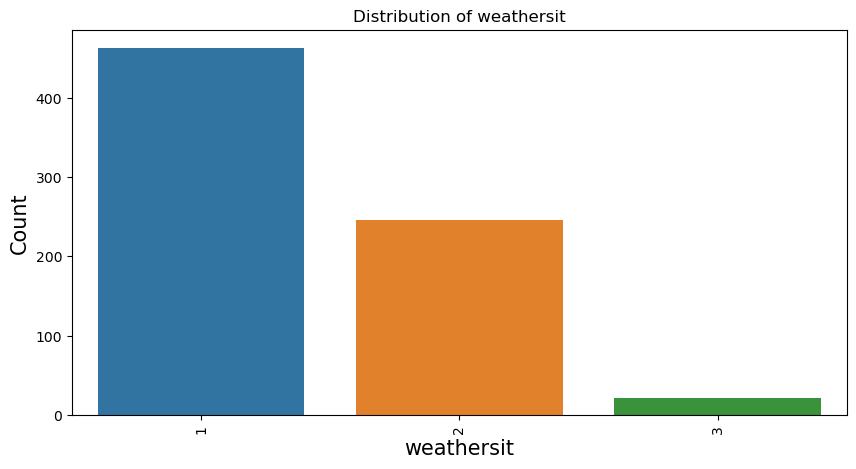

In [25]:
univariate_cat_col('weathersit')

#### 4.2.3 Outlier detection for numeric columns.

Working days are comparitively higher than Holiday which is expected.

temp


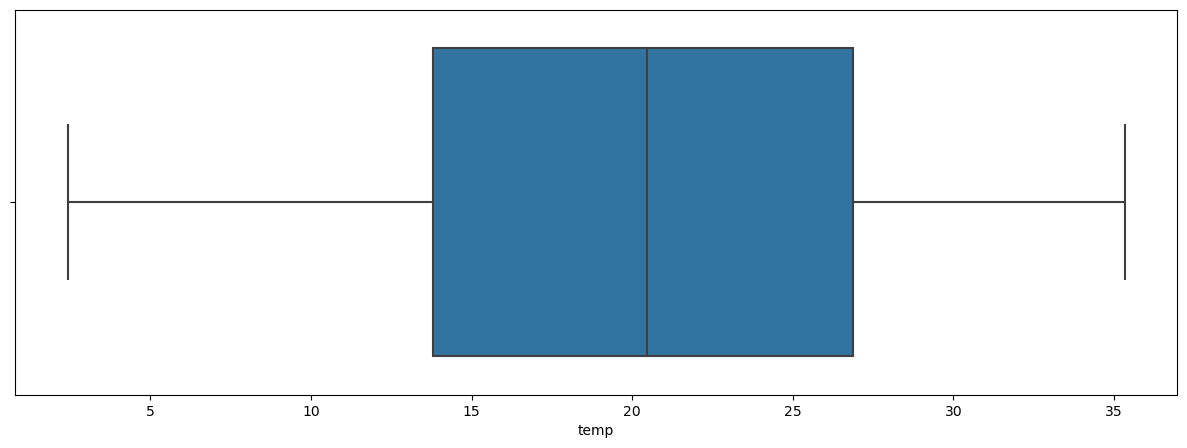

atemp


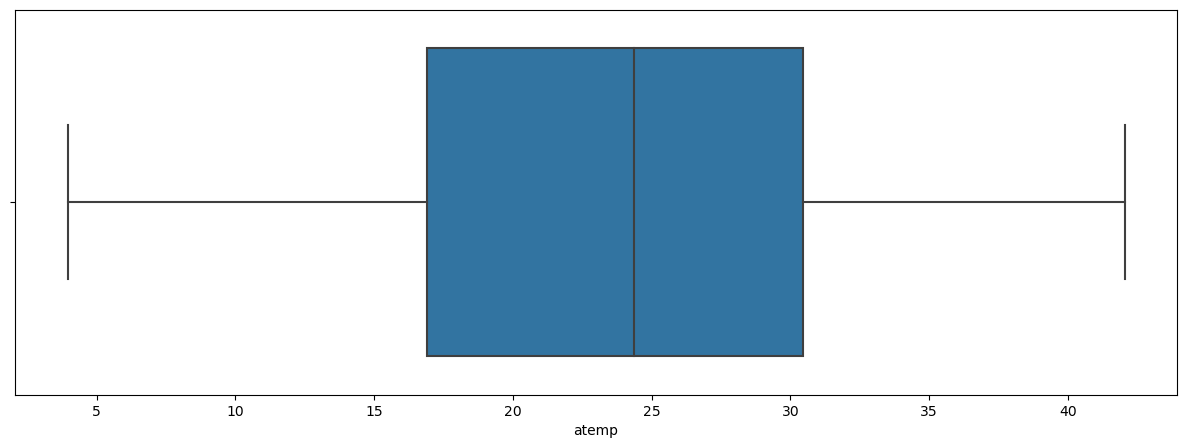

hum


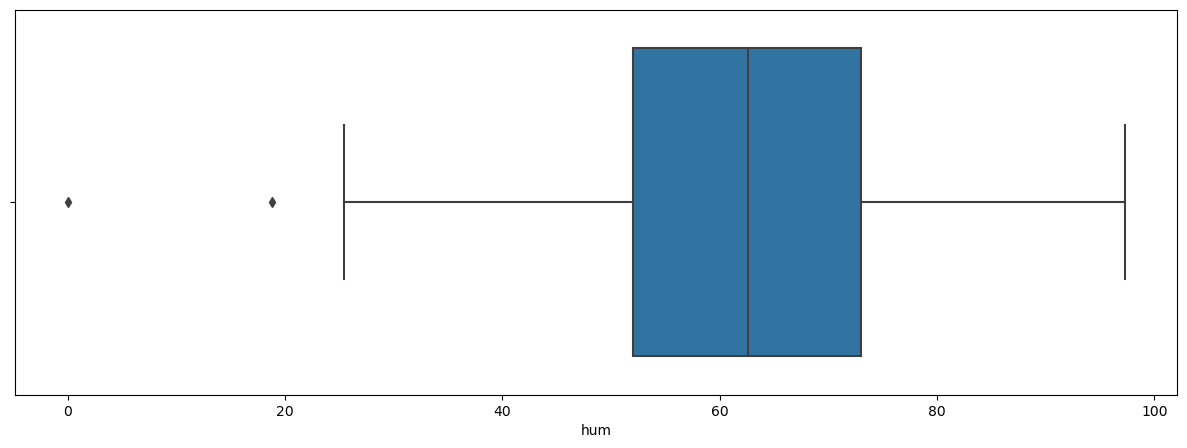

windspeed


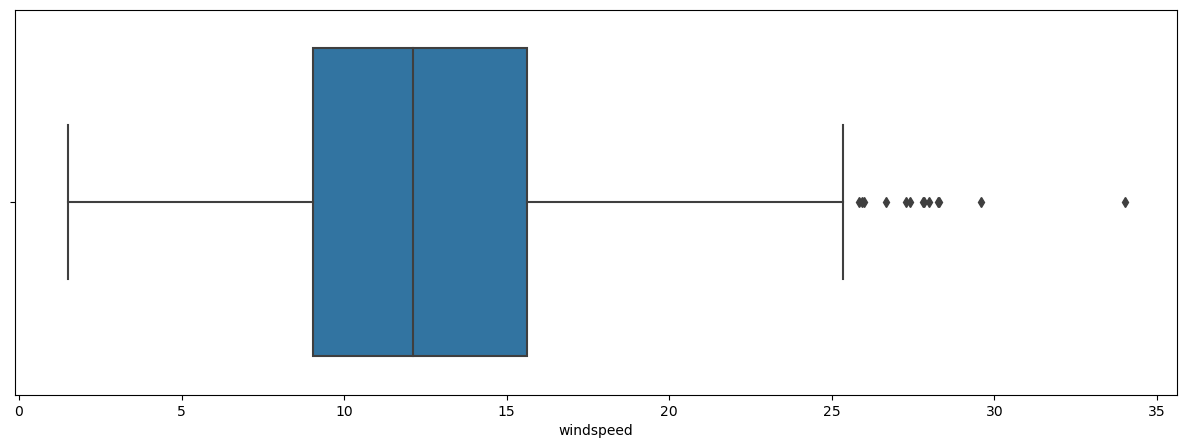

cnt


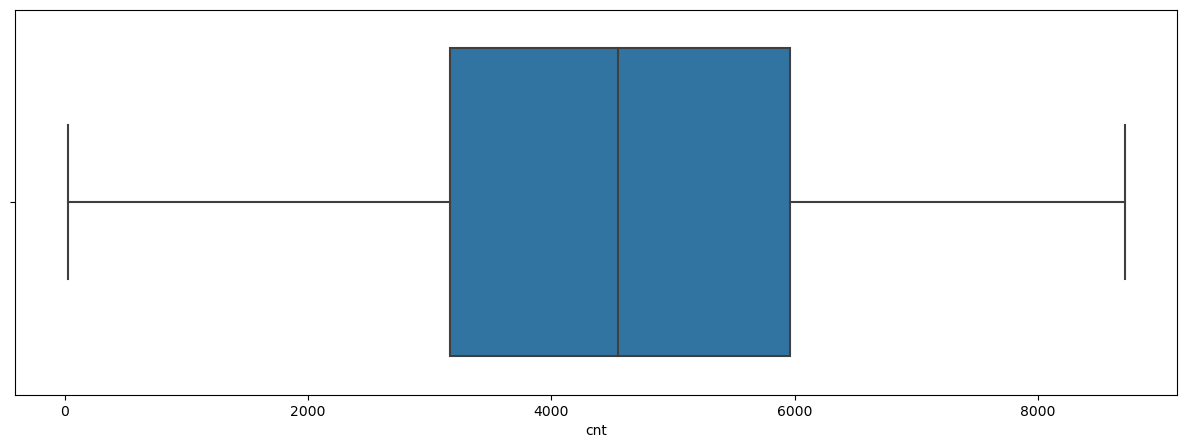

In [26]:
for i in num_col:
    print(i)
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df, x=df[i])
    plt.show()

Outliers are detected for Humidity and Windspeed Feature

### 4.3 Bivariate Analysis

#### 4.3.1 Numerical vs Categorical

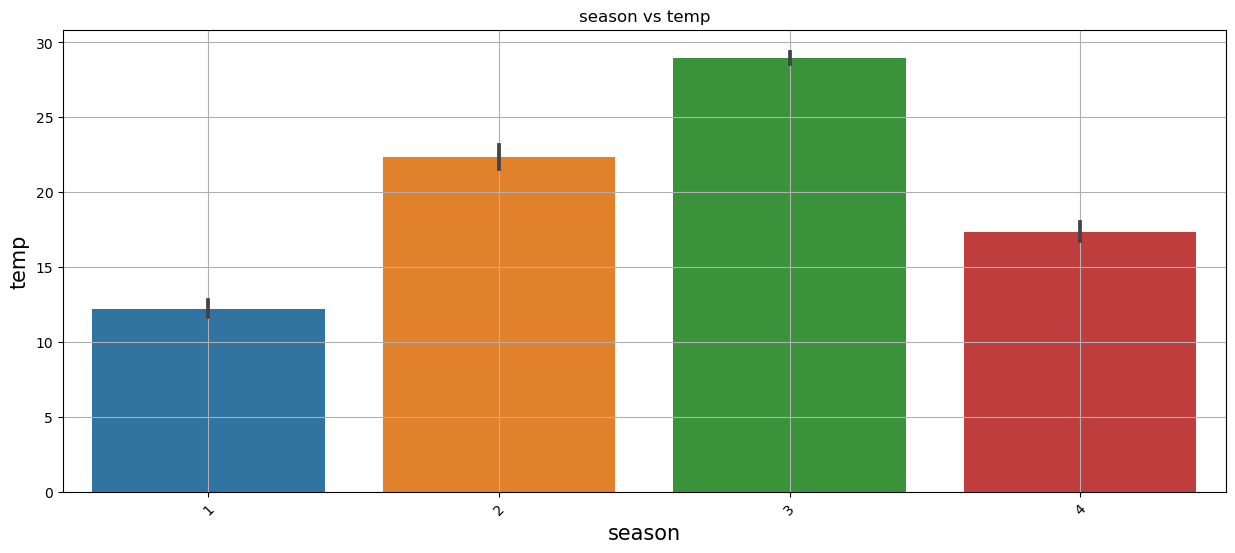

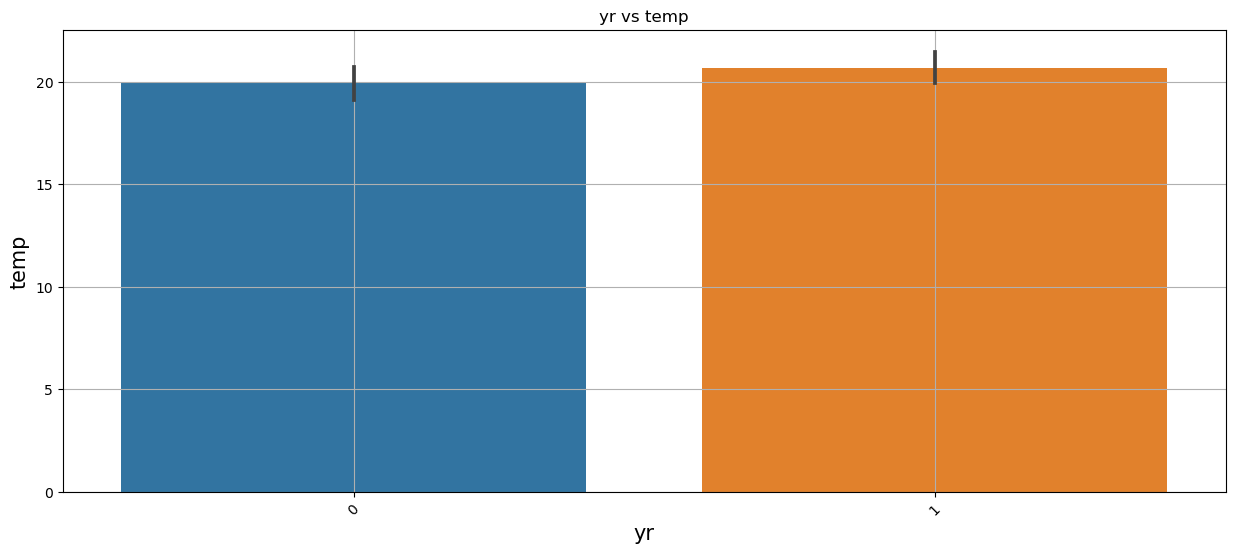

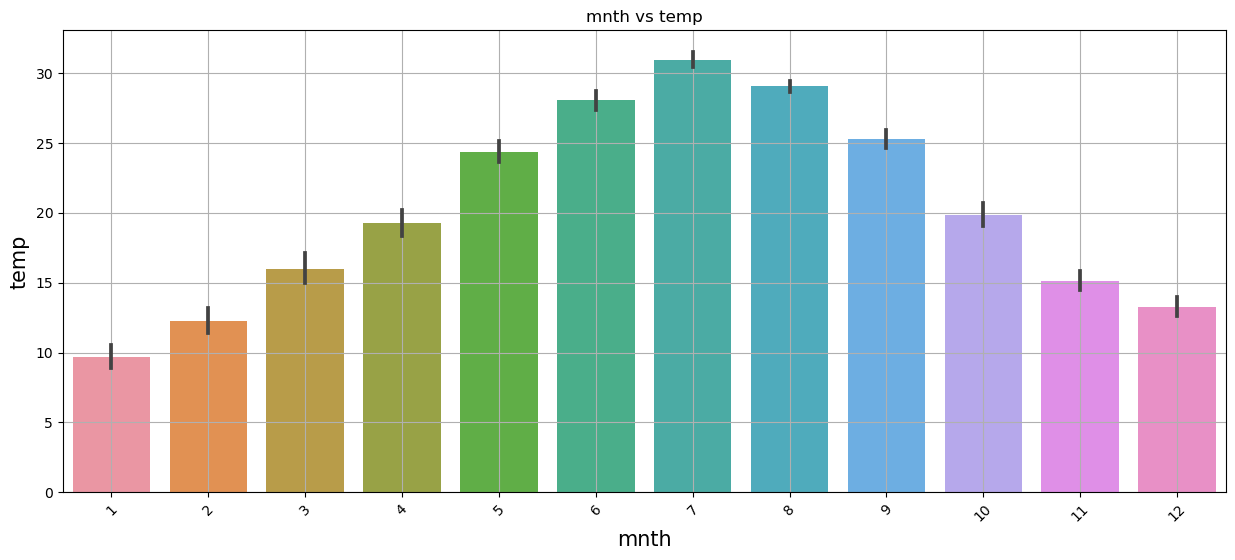

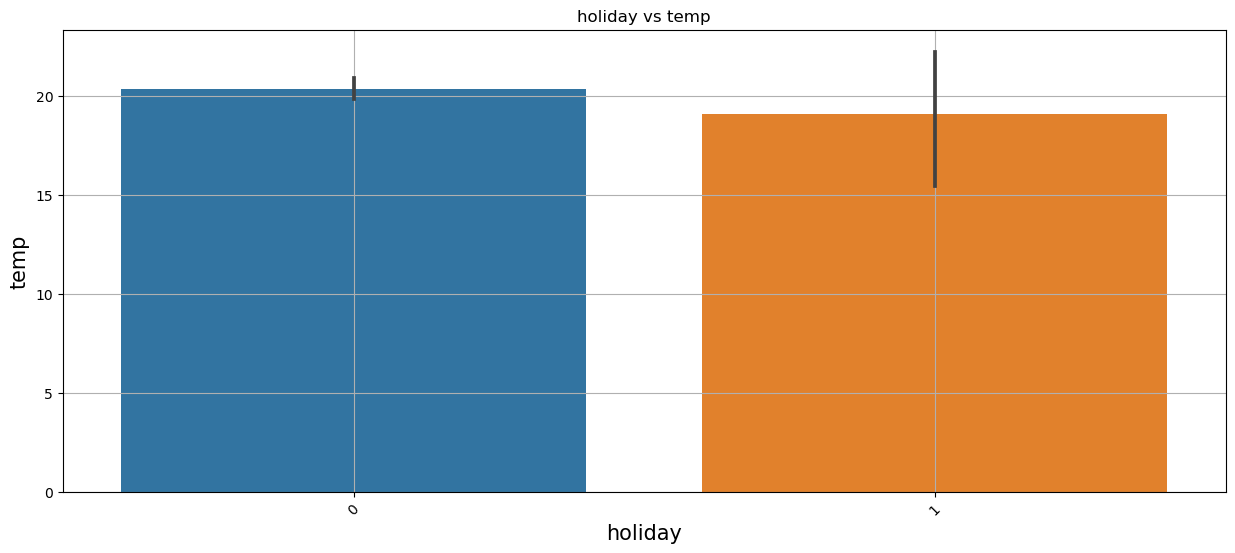

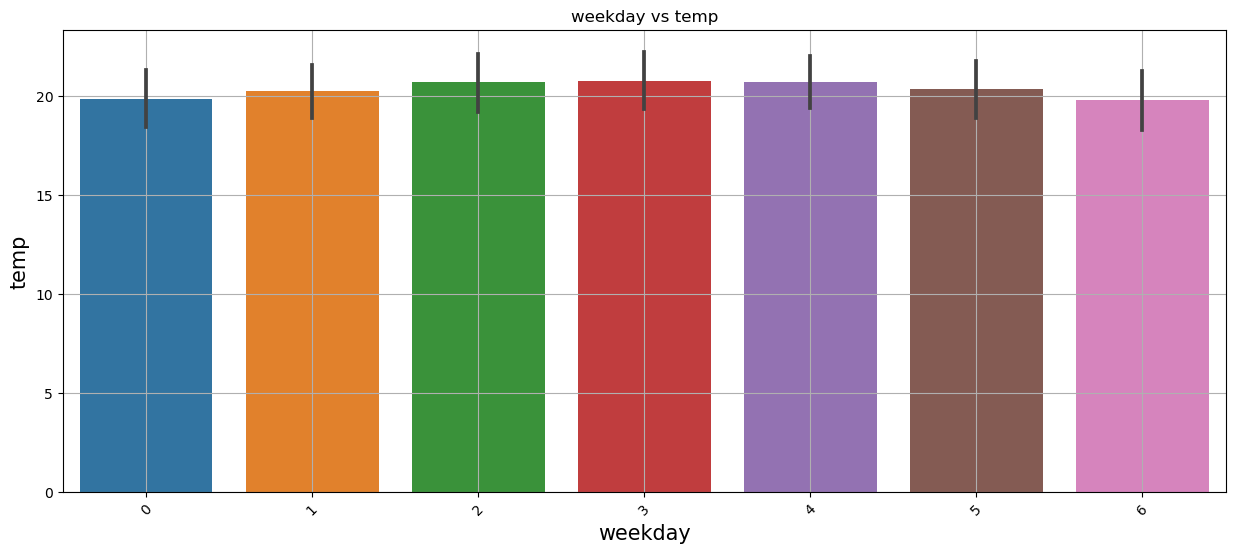

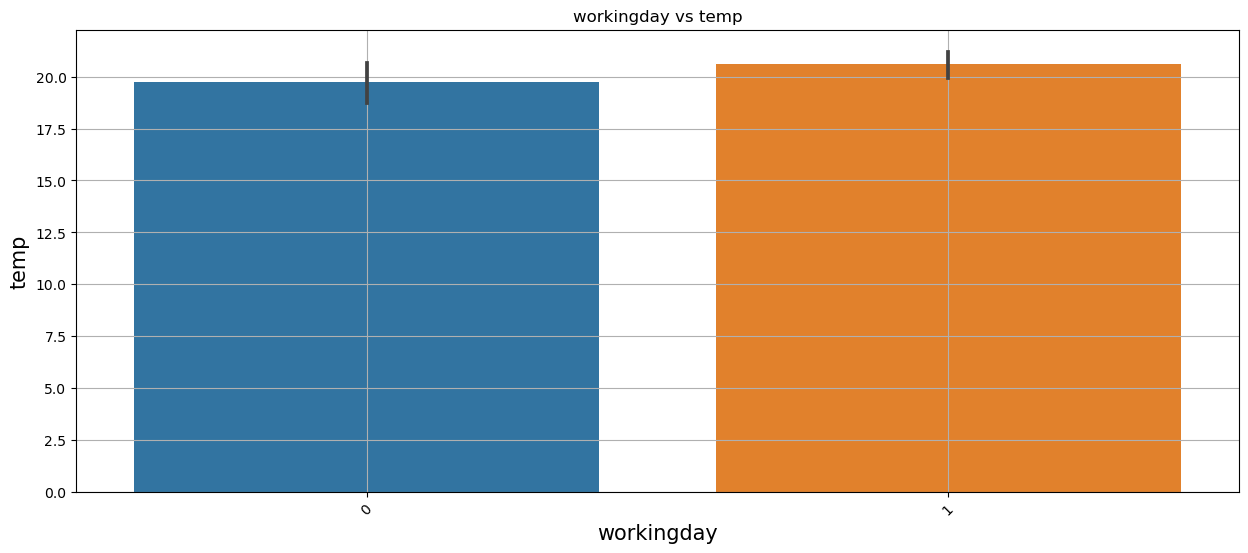

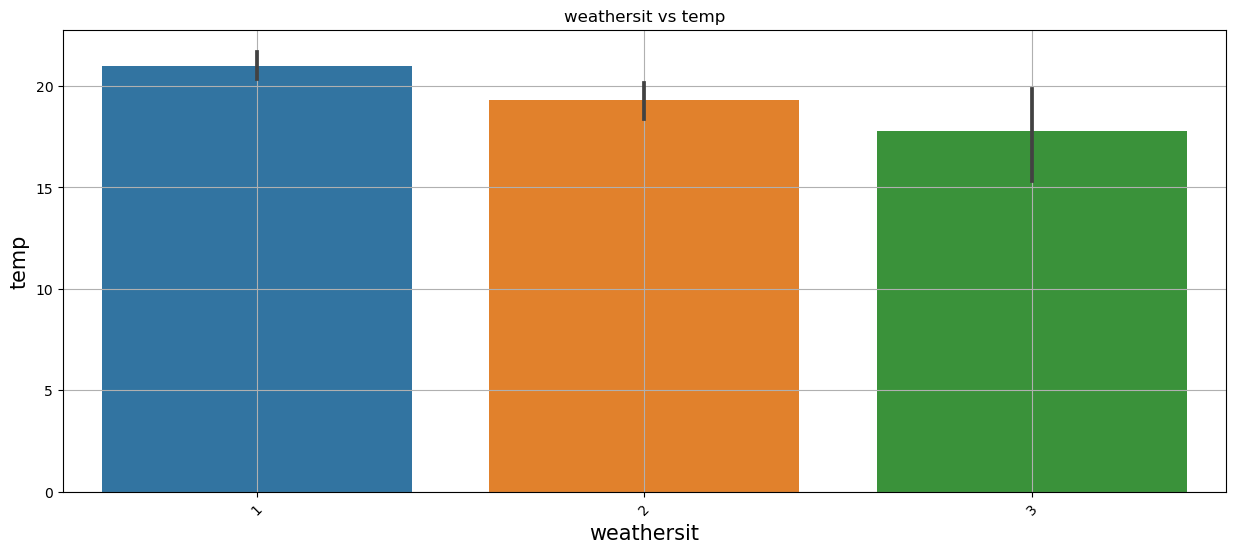

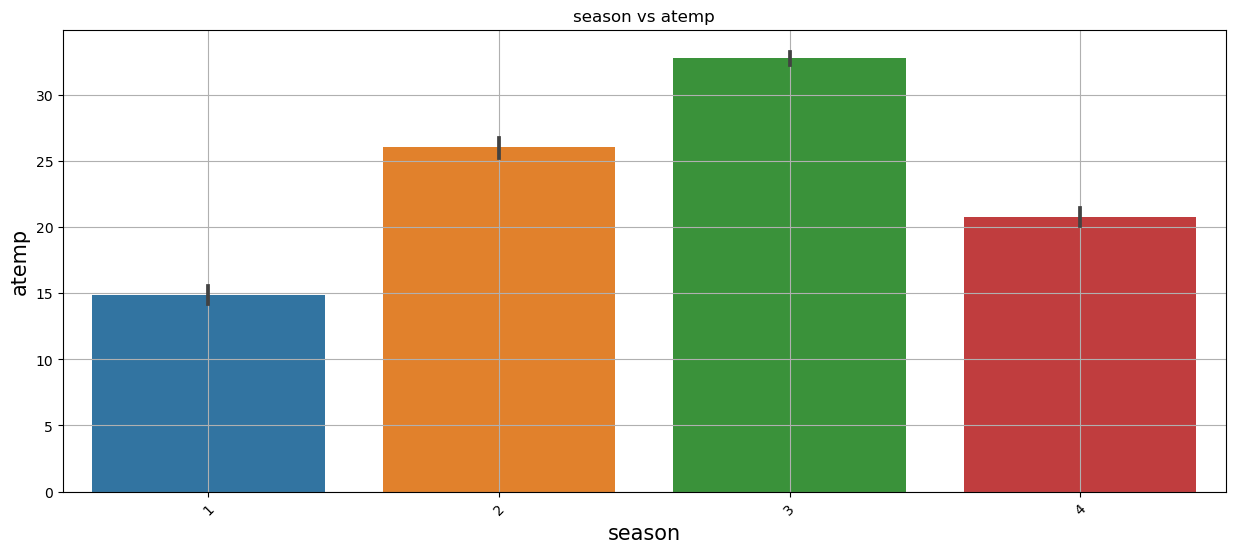

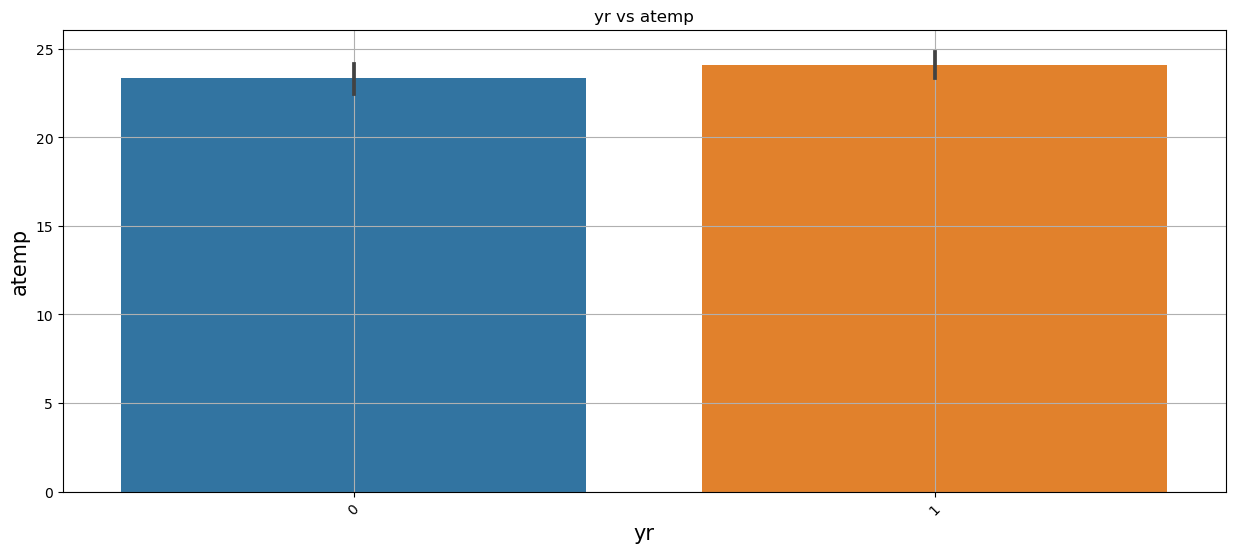

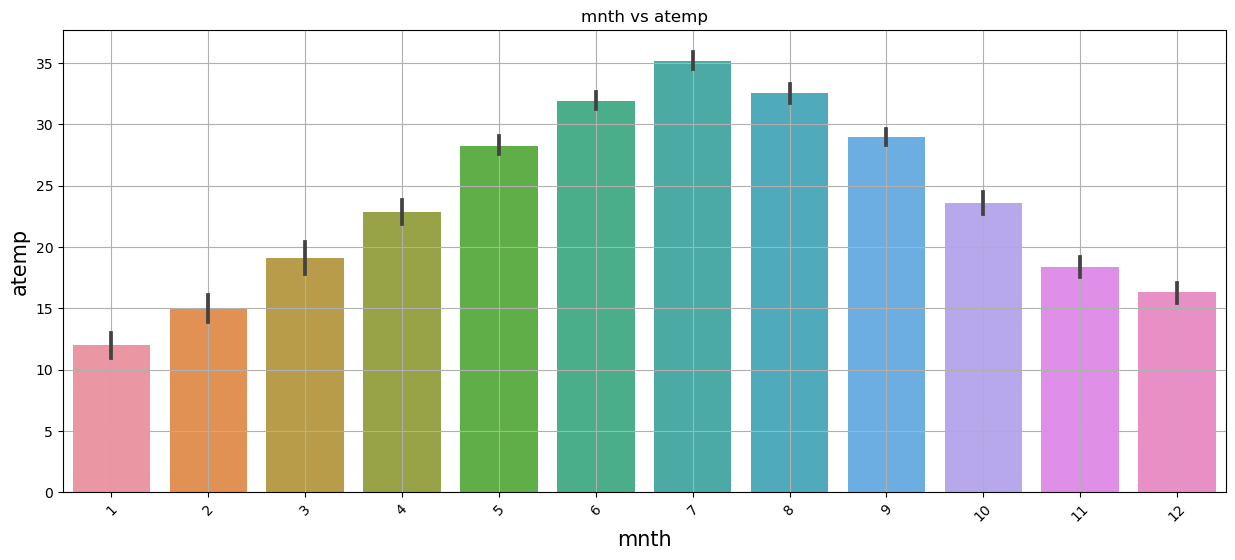

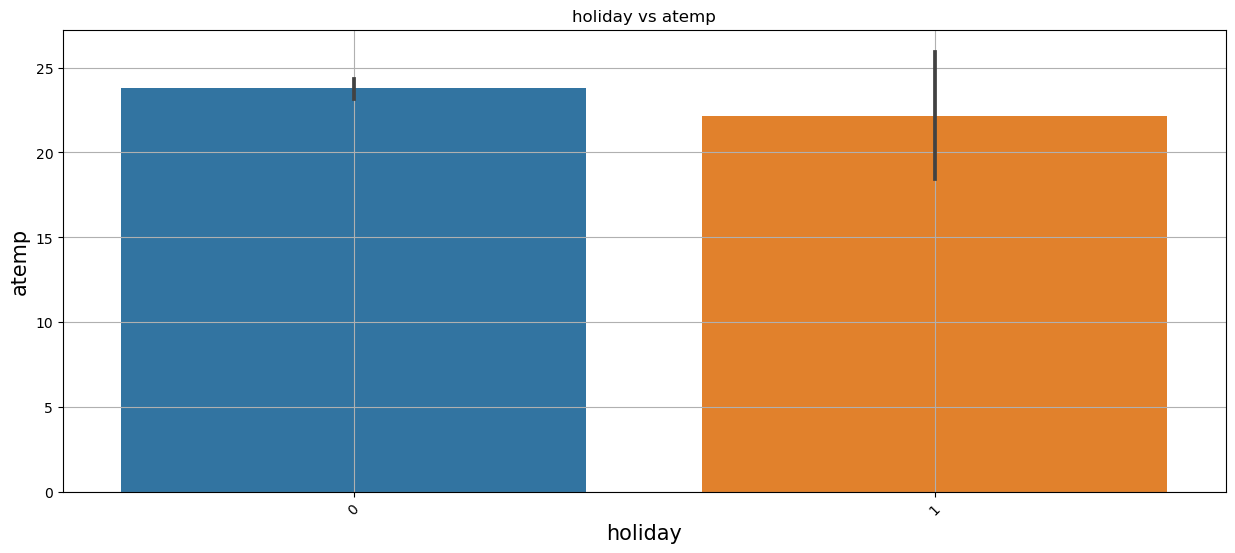

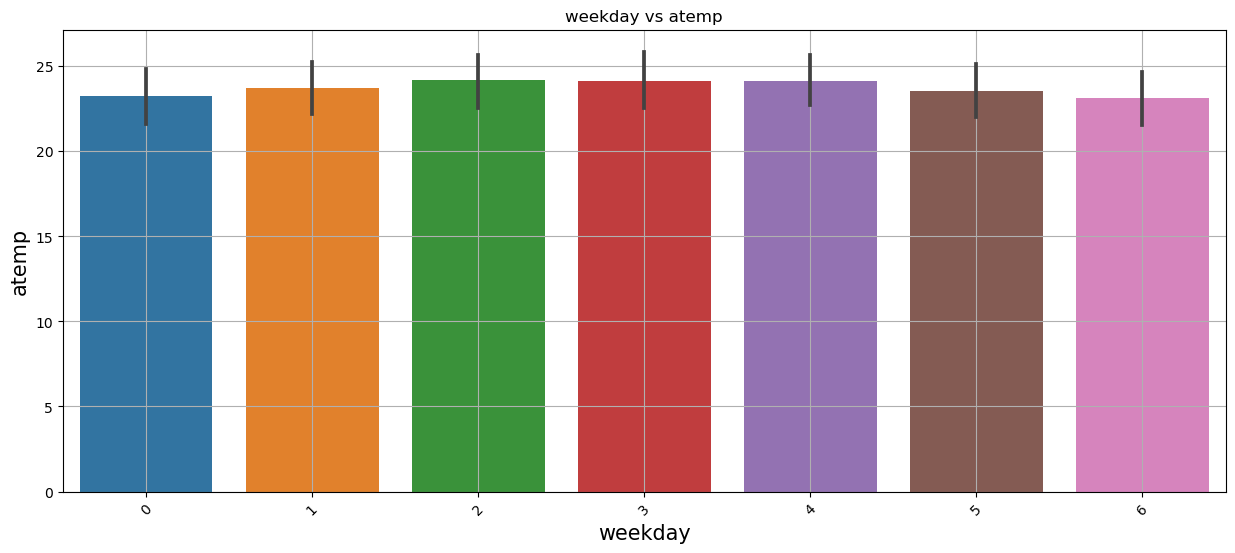

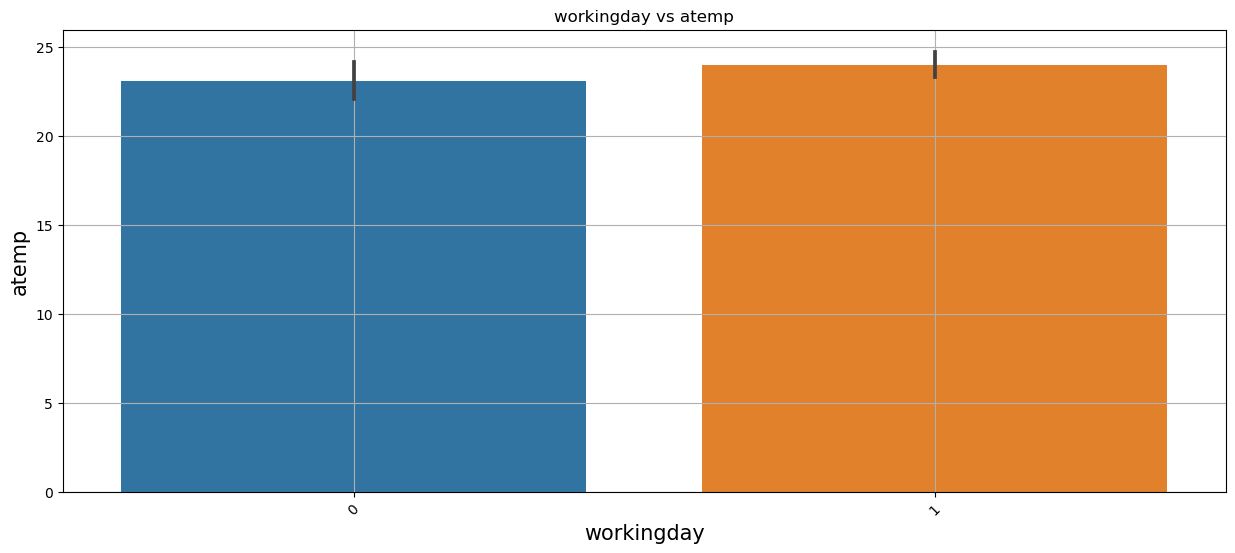

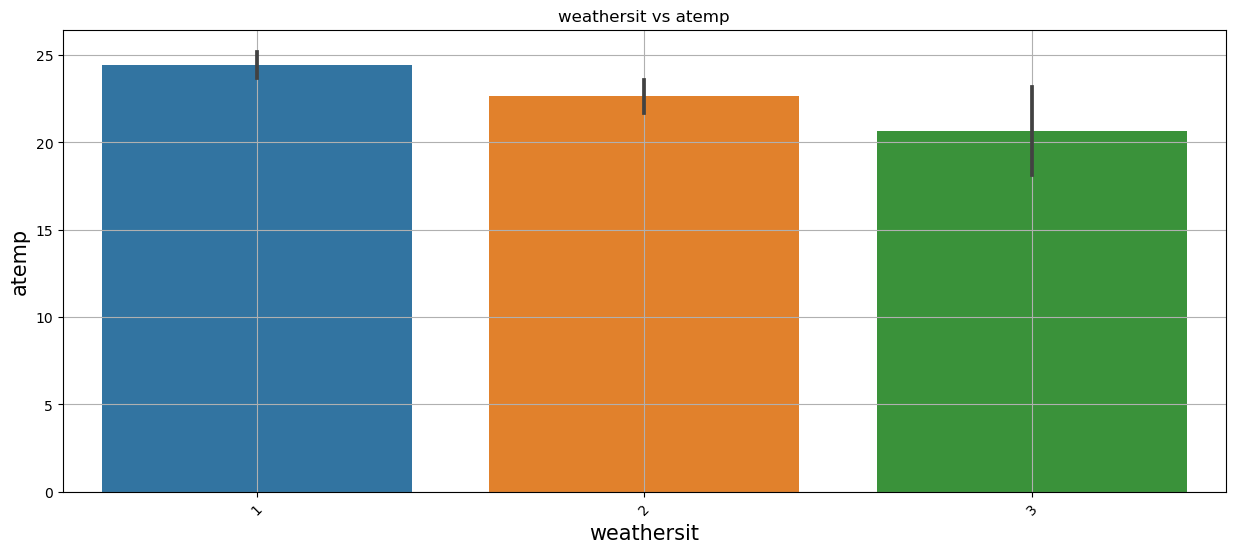

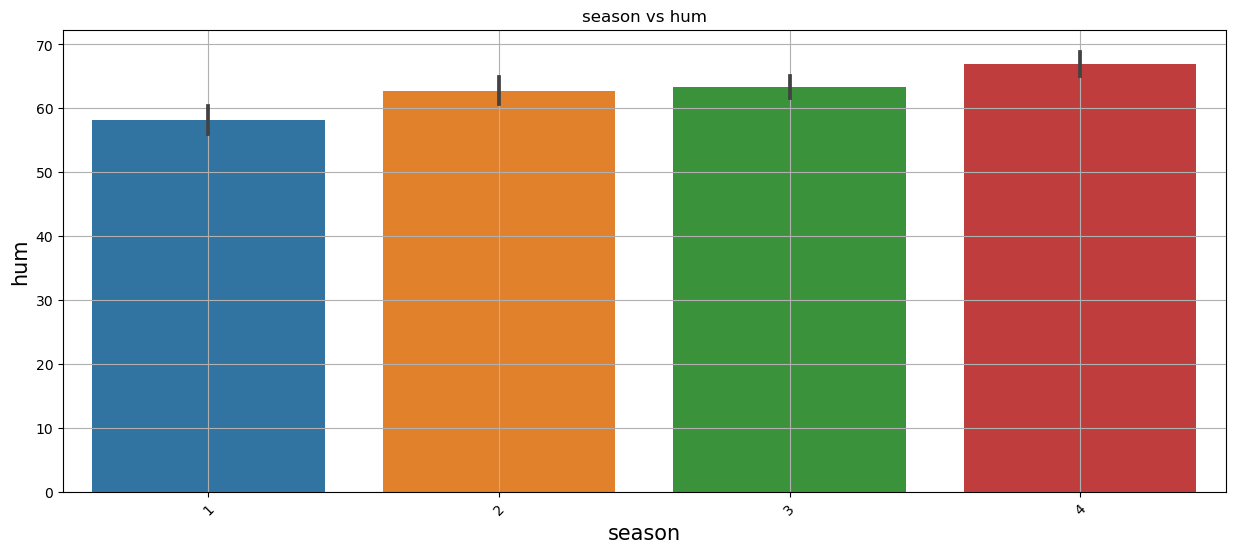

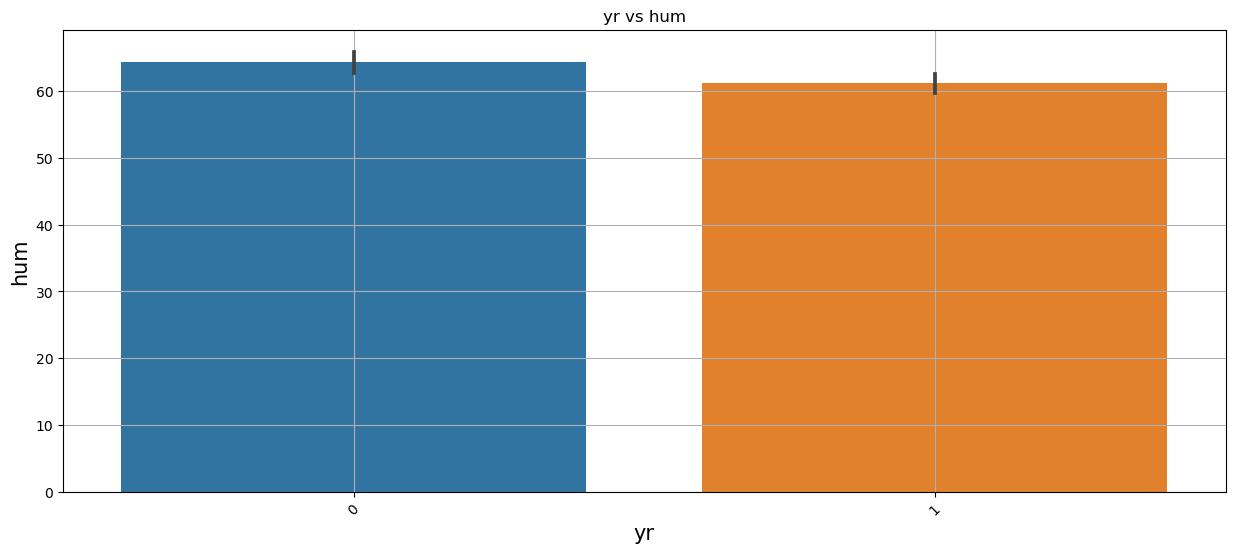

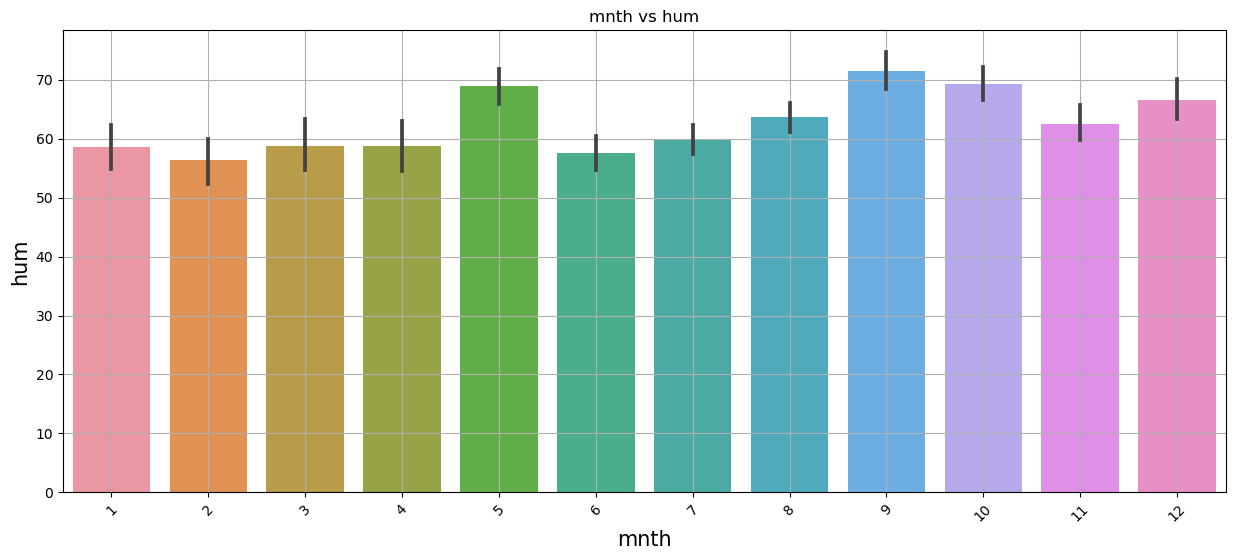

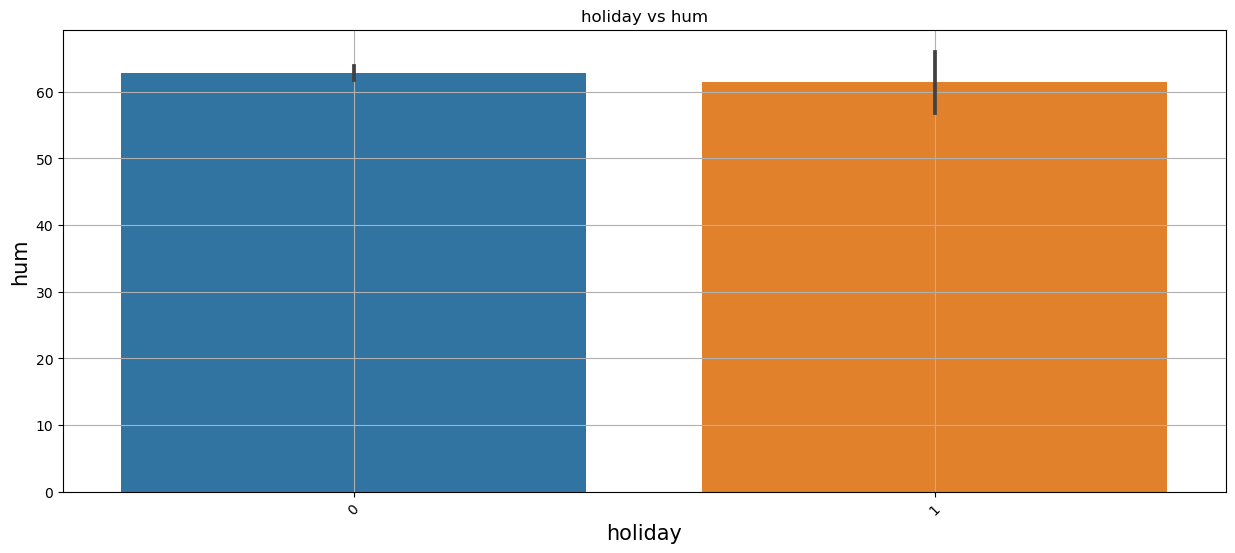

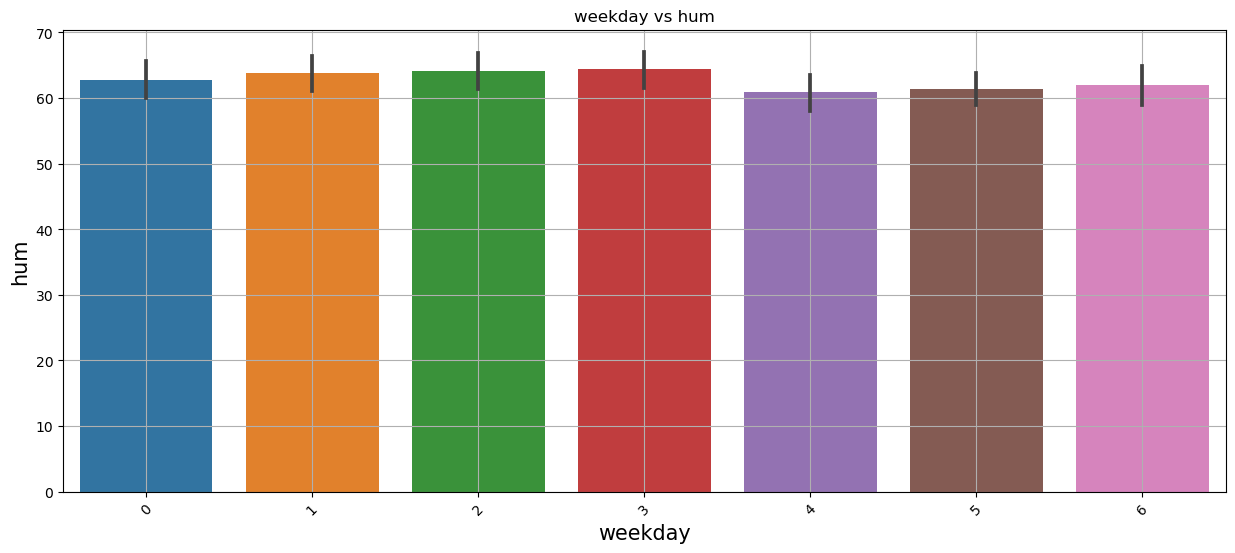

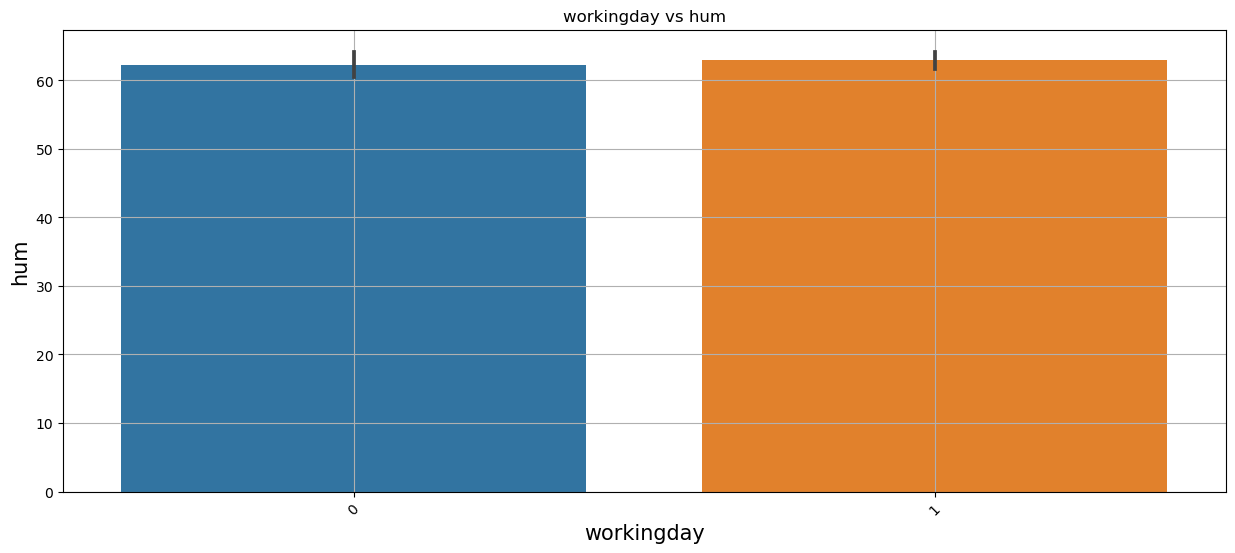

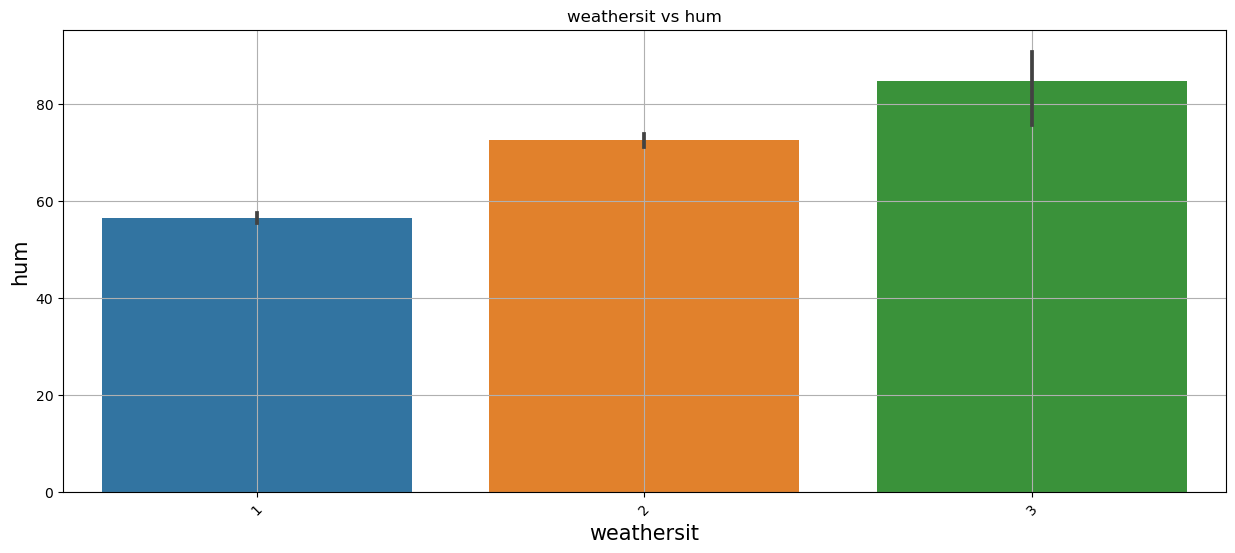

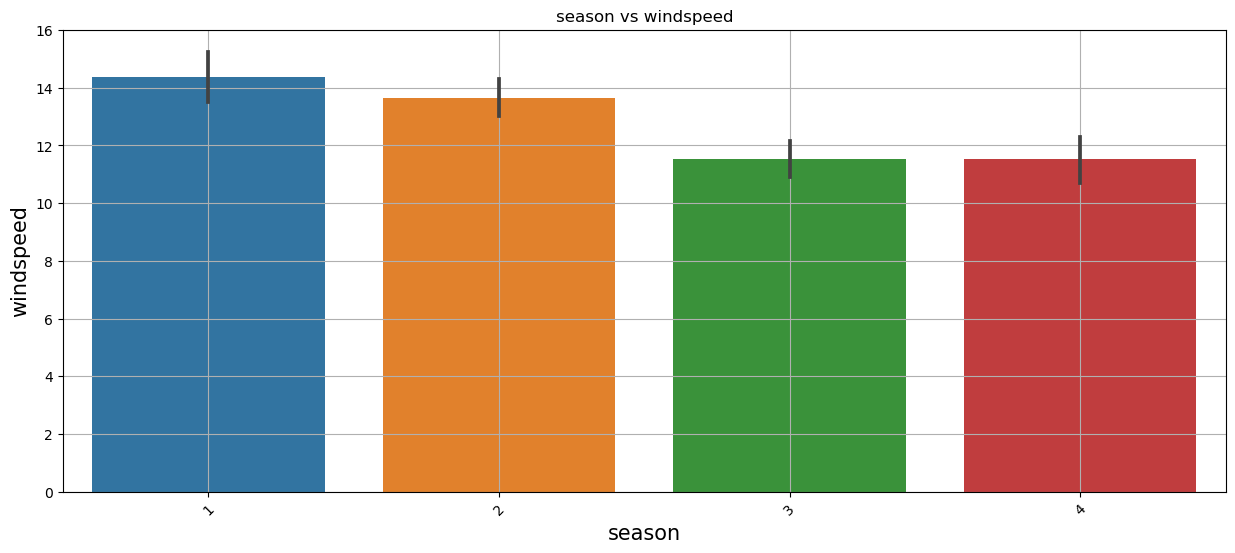

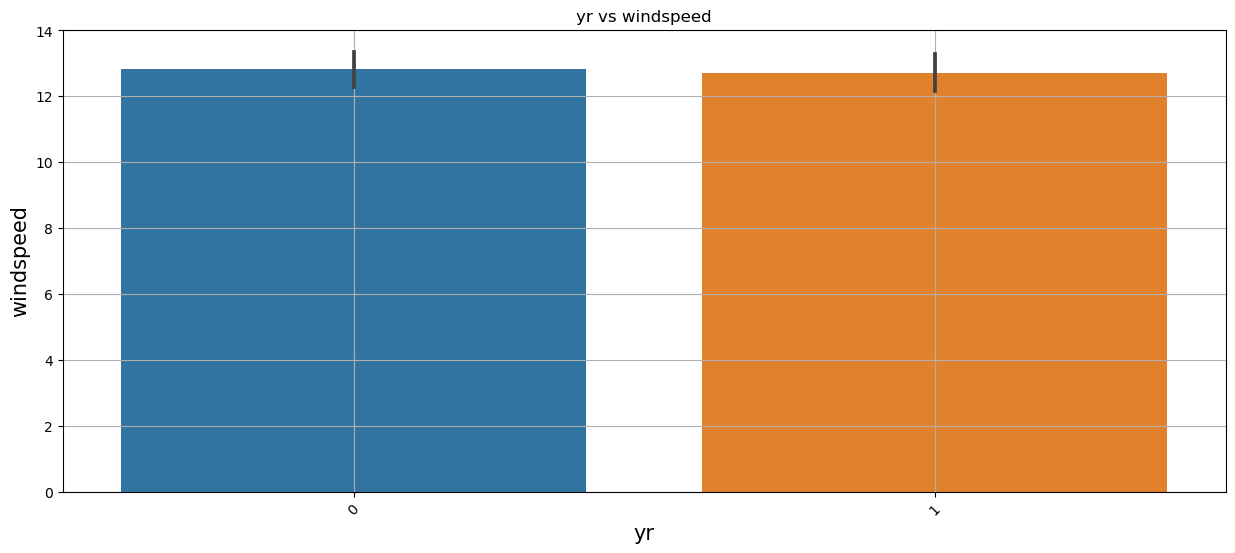

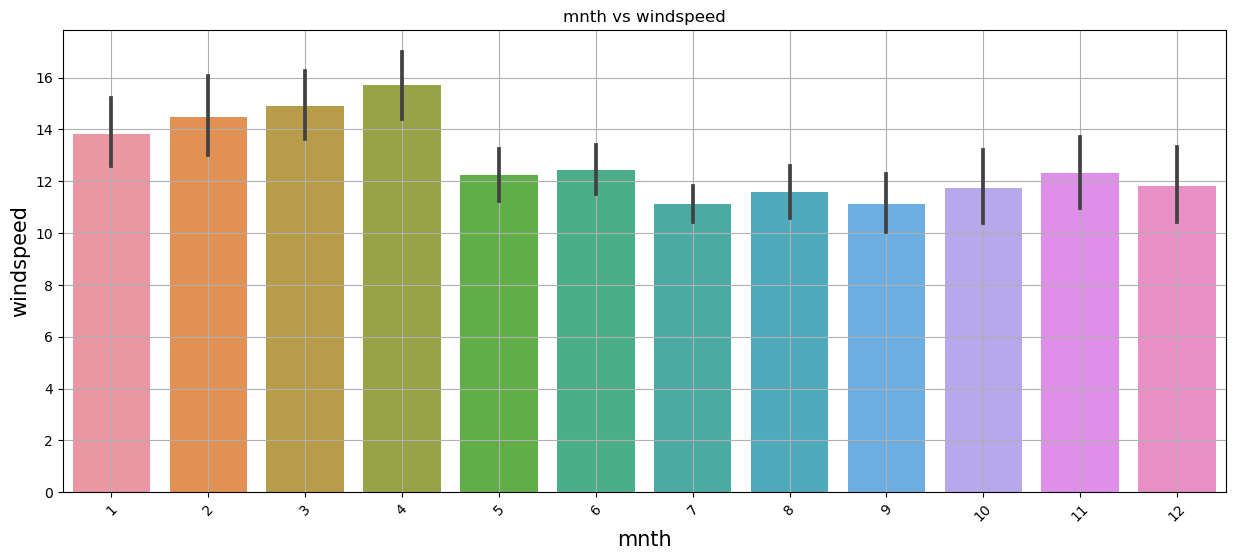

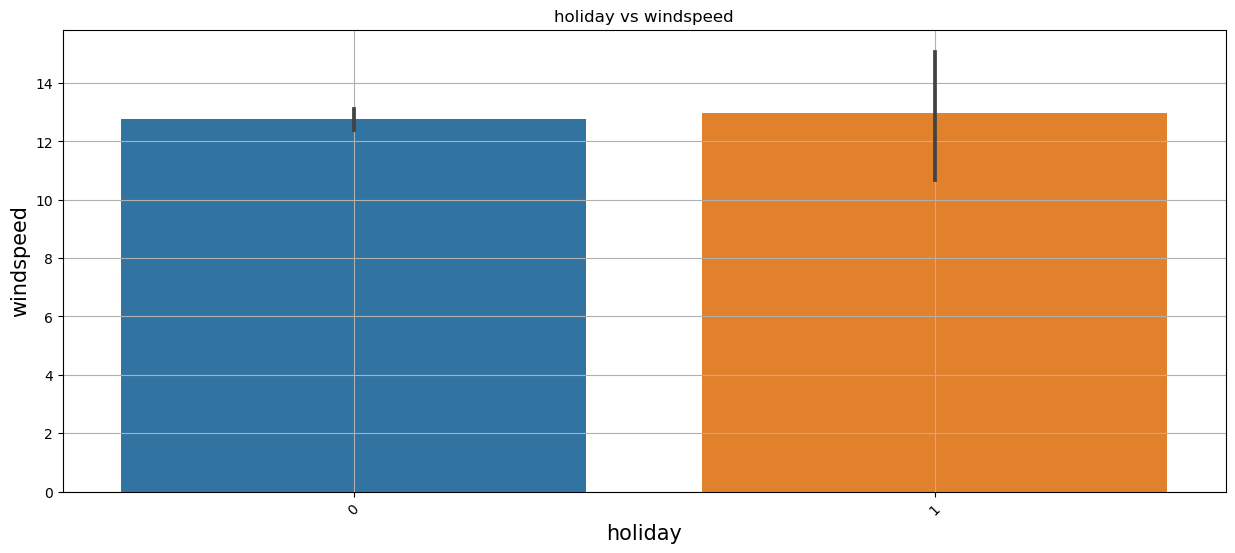

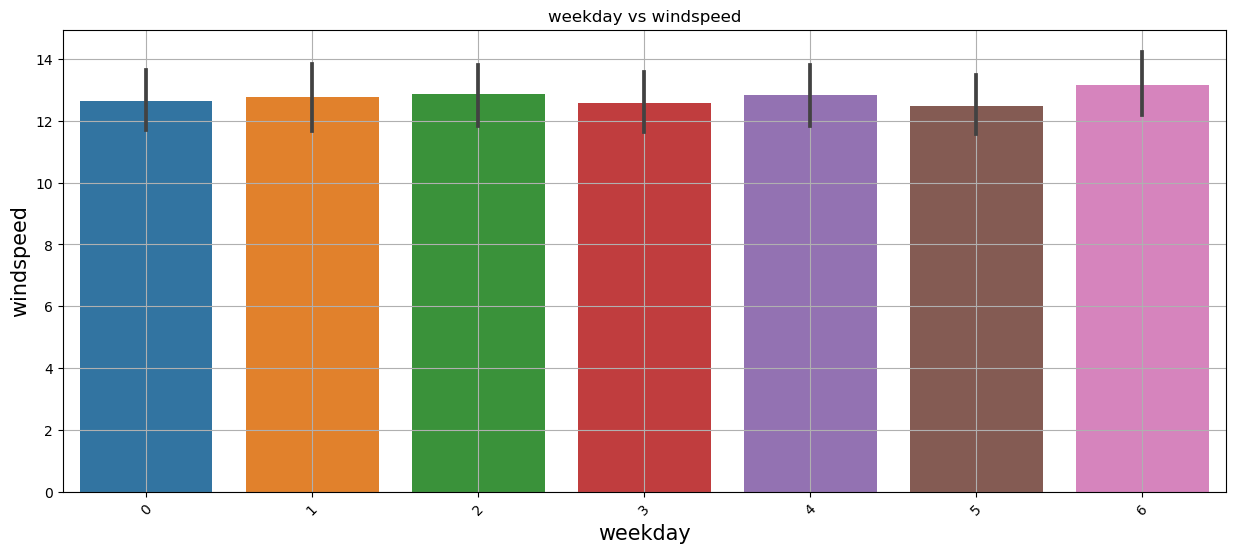

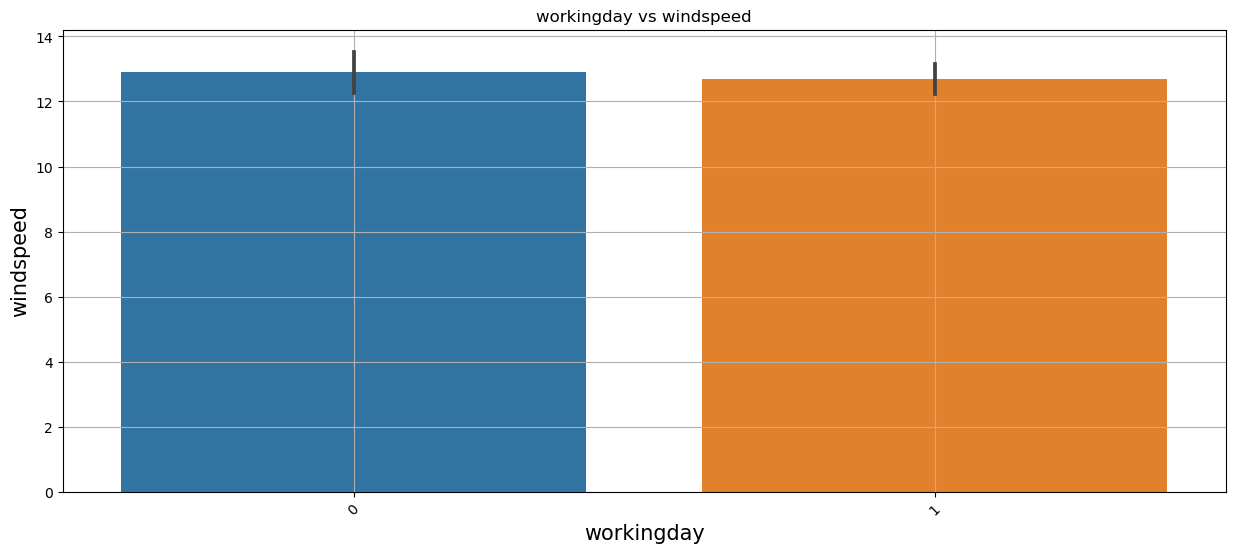

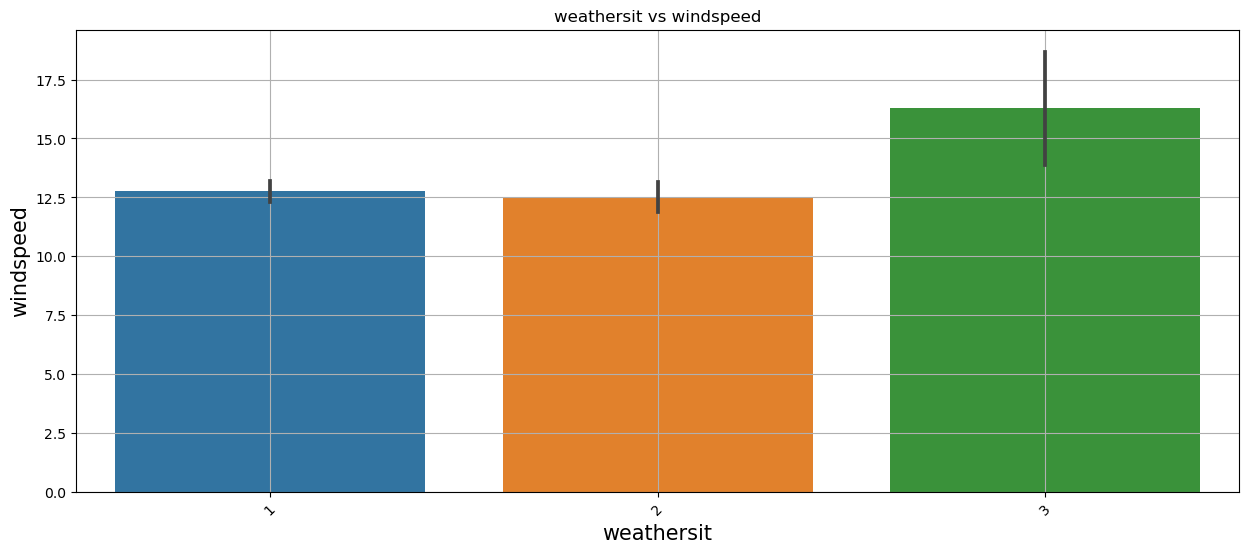

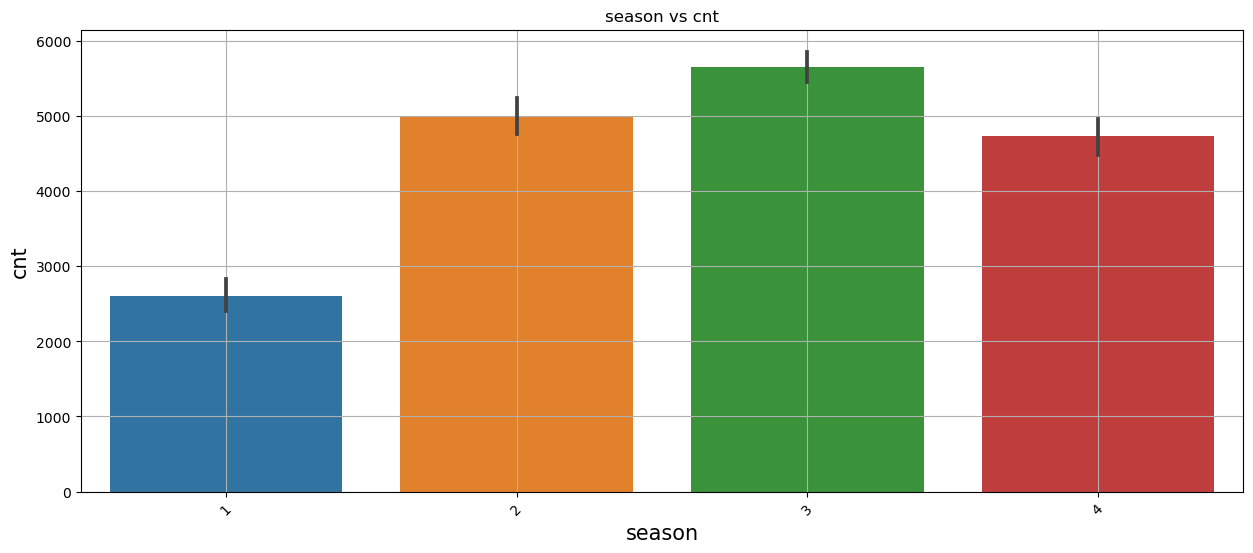

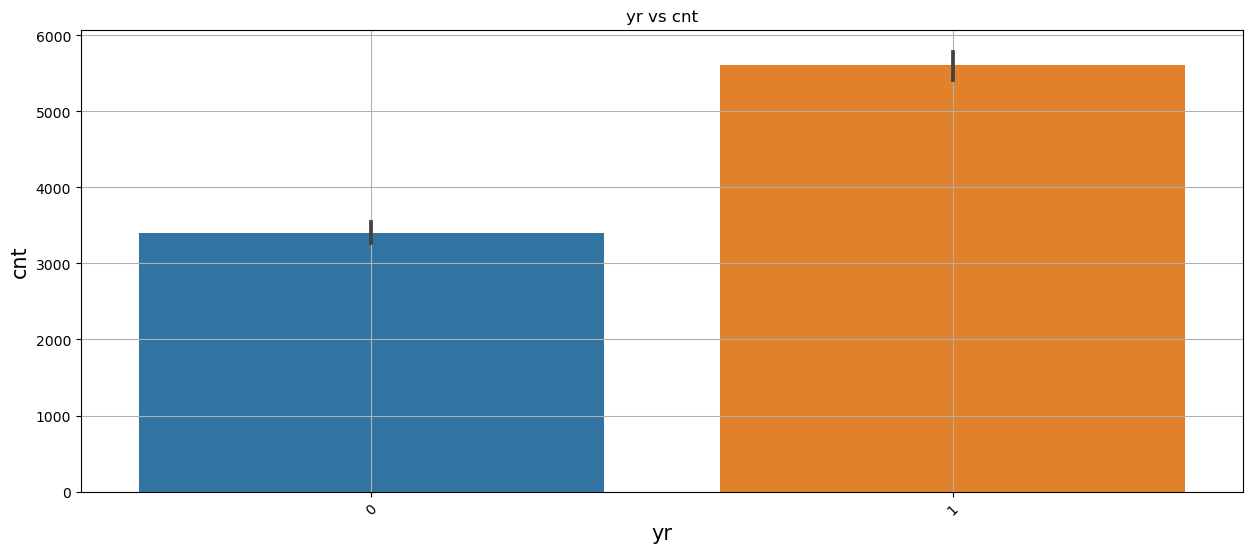

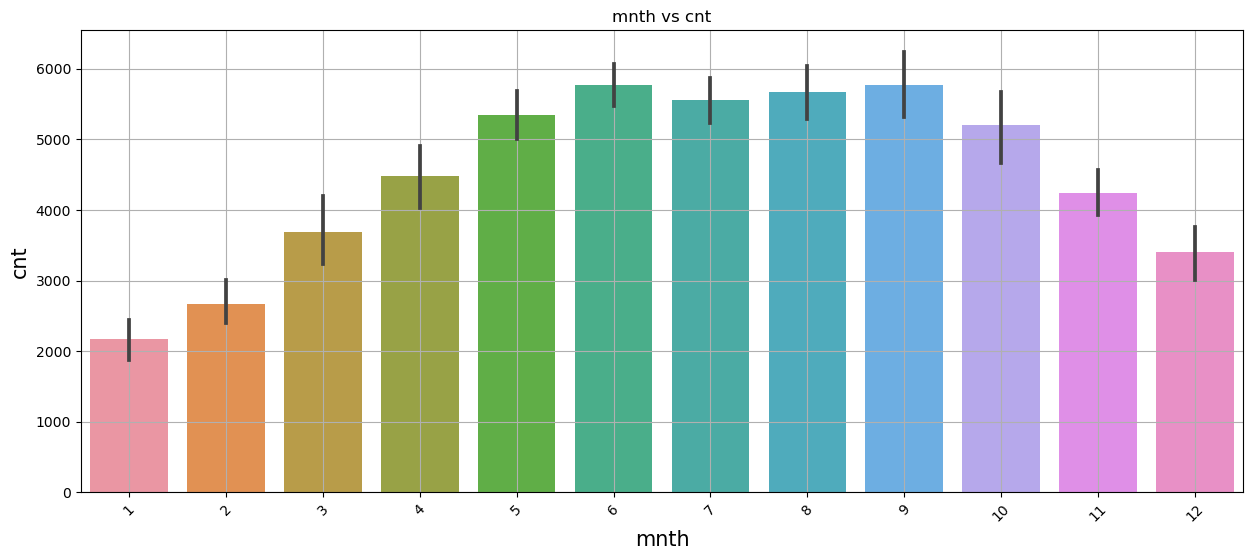

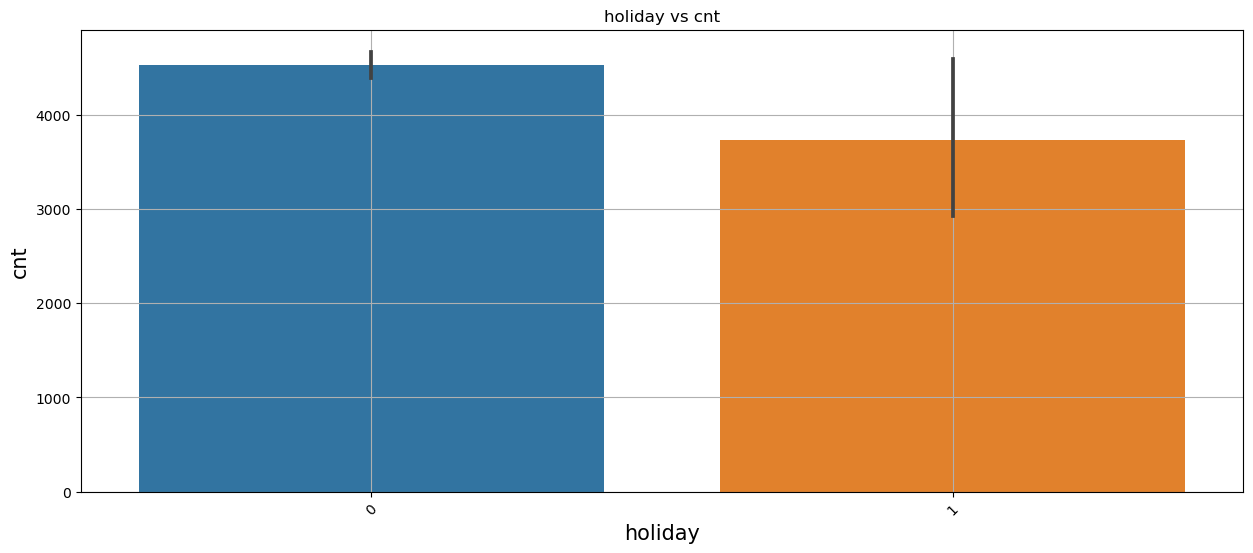

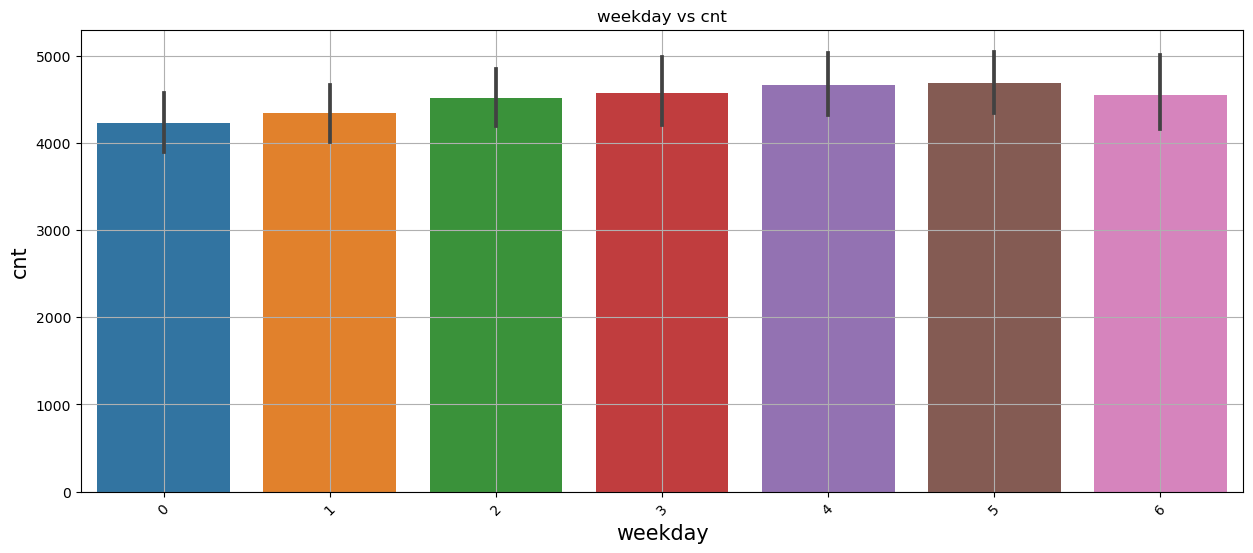

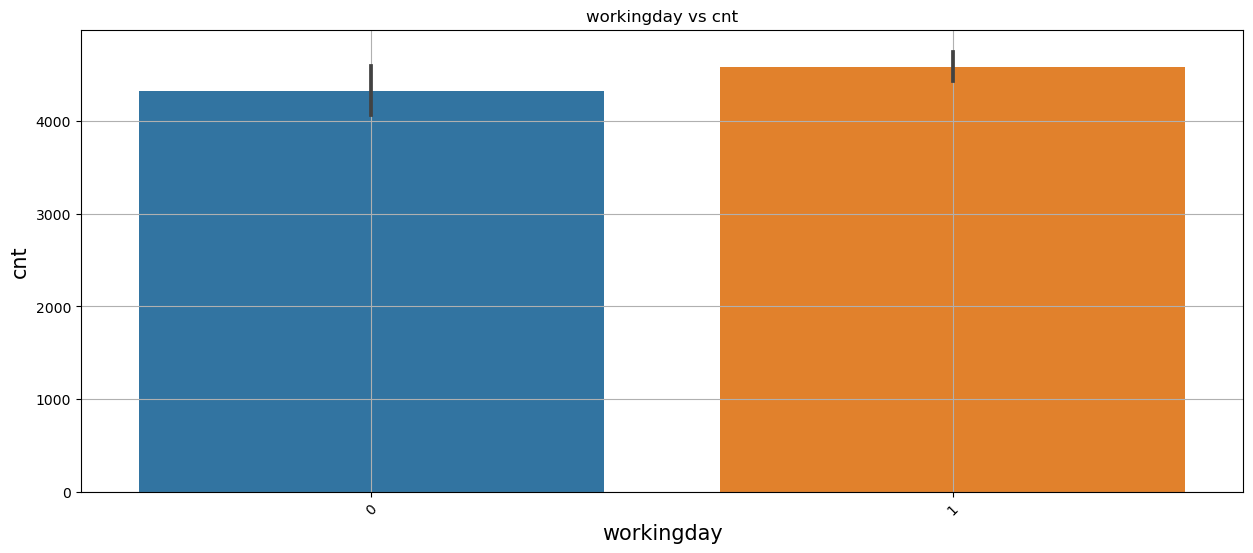

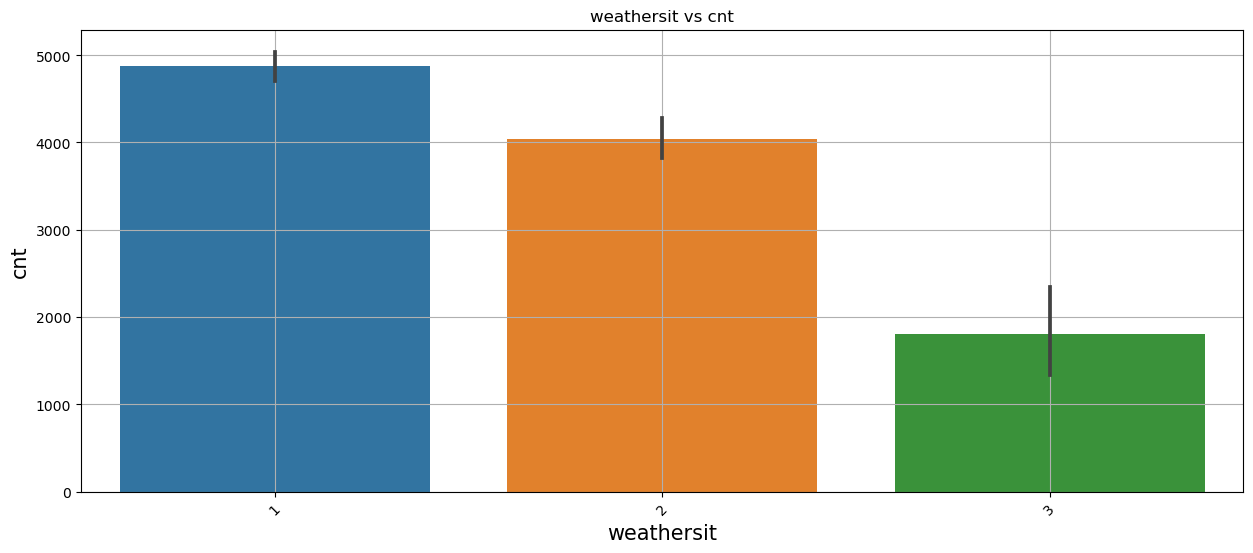

In [27]:
for i in num_col:
    for j in cat_col:
        plt.figure(figsize=(15,6))
        sns.barplot(data=df,x=df[j],y=df[i])
        plt.title(j + ' vs ' + i)
        plt.xlabel(j,fontdict={'size':15})
        plt.ylabel(i,fontdict={'size':15})
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

- Highest temperature was in season 3 which is 'Fall' and lowest was in season 1 which is 'Spring'.
- The temperature was slightly high on year 1 which is 2019.
- In the month of july the temperature was highest and lowest was on January.
- Most of the holidays were having temperature lower than 20C
- Most of the Working day were having temperature >20C
- Lowest temperature was recorded for weathersit 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +         Scattered clouds) and highest temperature was there for weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy)
- lowest temperature was 15C for season Spring and highest was for season Fall with temperature 35C.
- Highest humidity was is season 4 which is winter.
- Humidity was highest in the month of September.
- Highest windspeed was in season Spring.
- Highest wind speed was there in month of April
- <b>Count of total rental bikes was highest in Fall season.
- <b>Count of total rental bikes was highest in 2019.
- <b>Count of total rental bikes was highest in th month of June and September.
- <b>Count of total rental bikes was highest the Workingday rather than Holiday.
- <b>Count of total rental bikes was highest when weathersit is 1(Clear, Few clouds, Partly cloudy, Partly cloudy)

#### 4.3.2Scatterplot (Numerical vs Numerical )

In [28]:
def scatter_plot(col1,col2):
    plt.title(col1+' vs '+col2)
    sns.scatterplot(data=df,x=col1,y=col2)
    plt.show()

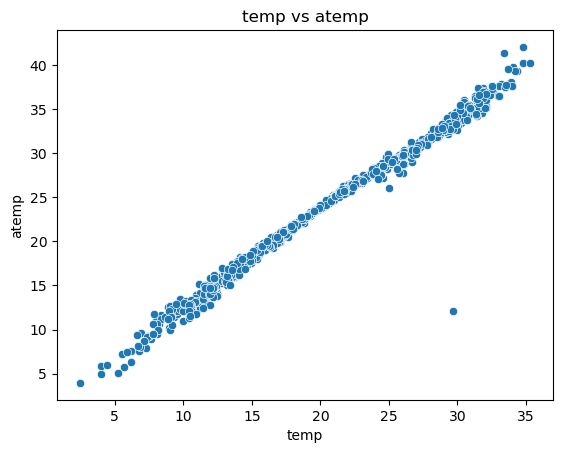

In [29]:
scatter_plot('temp','atemp')

Temperature and feeling temperature are highly correlated with each other and it is a Positive correlation

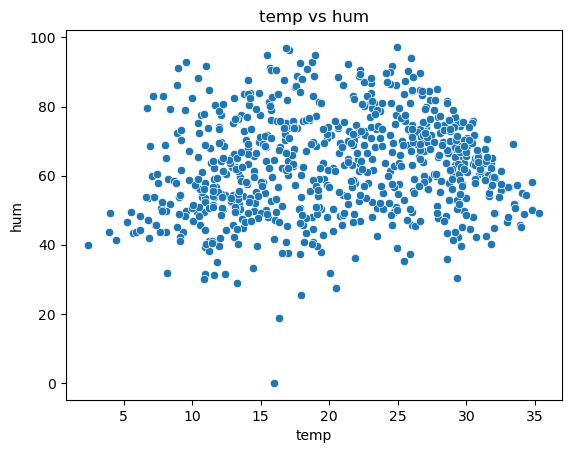

In [30]:
scatter_plot('temp','hum')

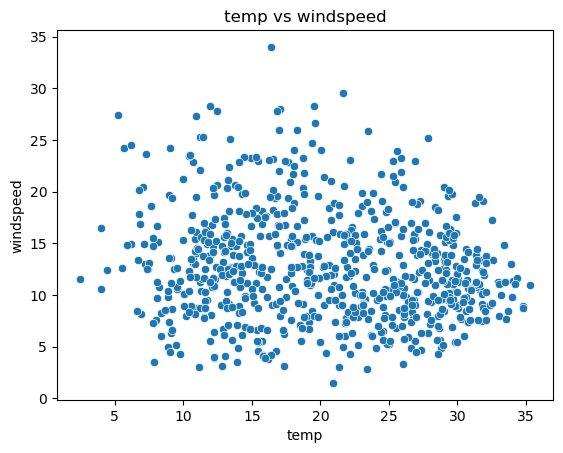

In [31]:
scatter_plot('temp','windspeed')

- Humidity vs Temperature are not having any correlation
- Windspeed vs Temperature are also not correlated with each other

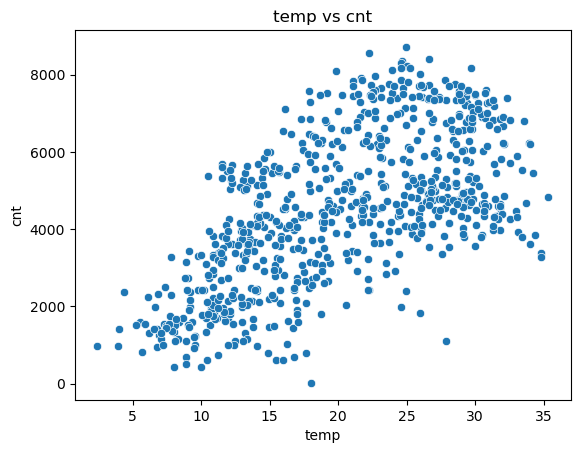

In [32]:
scatter_plot('temp','cnt')

Temperature and Count of total rental bikes are somewhat positively correlated with each other

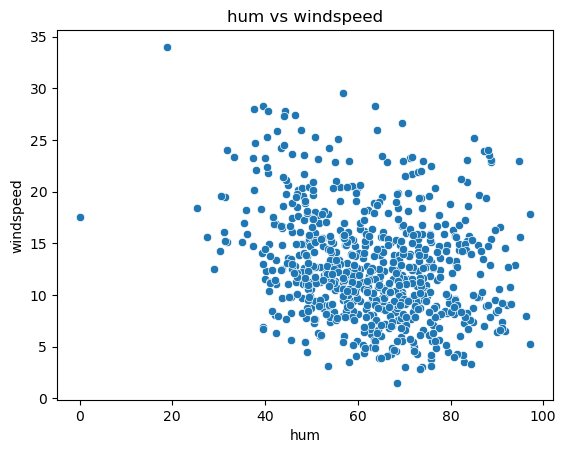

In [33]:
scatter_plot('hum','windspeed')

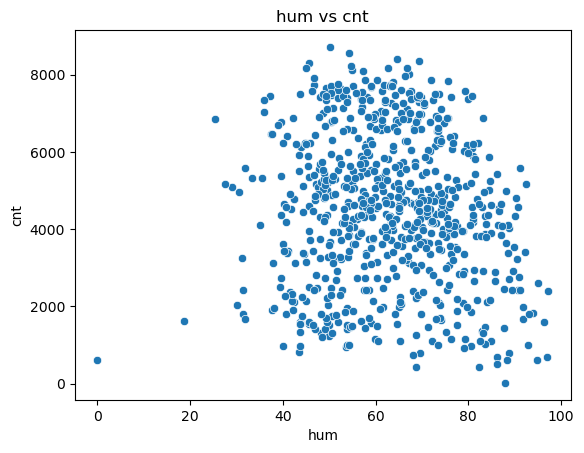

In [34]:
scatter_plot('hum','cnt')

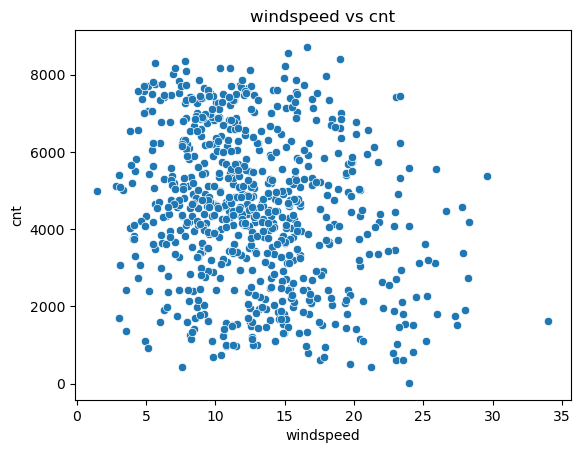

In [35]:
scatter_plot('windspeed','cnt')

### 4.4 Multivariate Analysis

#### 4.4.1 Pairplot

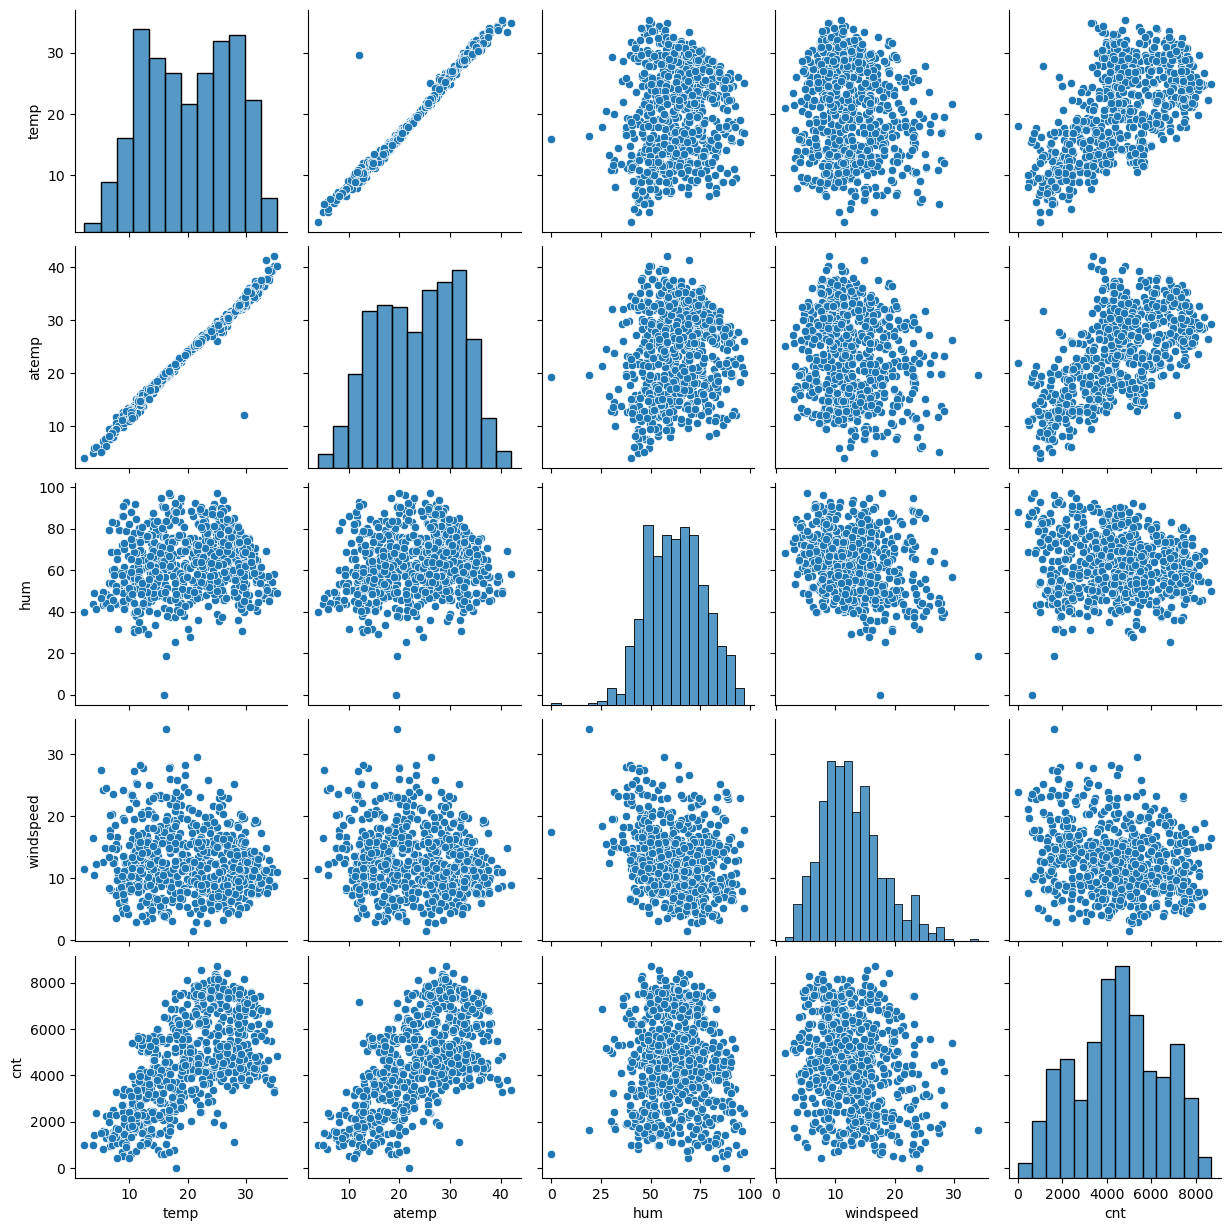

In [36]:
sns.pairplot(df[num_col])
plt.show()

#### 4.2 Heatmap

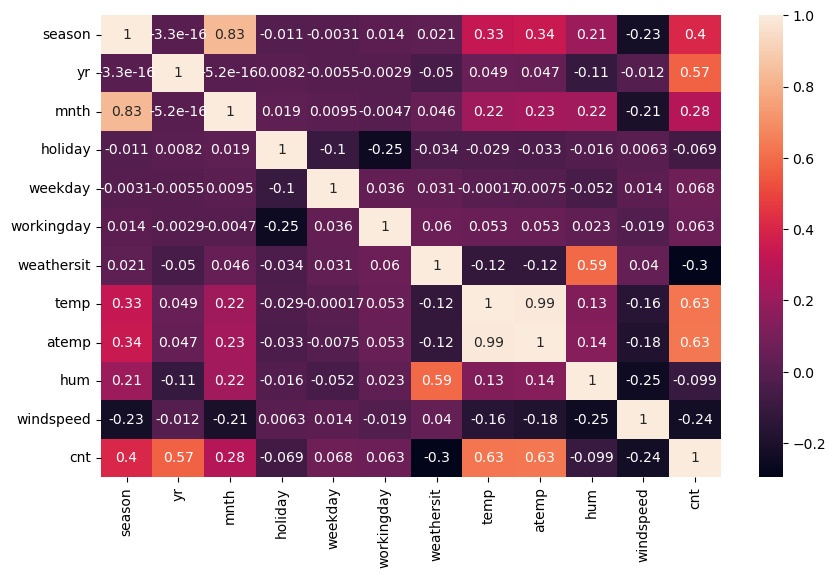

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Positively correlated Variable and their coefficients are noted sown below in order of high correlation:
    1. Month and Season(0.83)
    2. Temperature and count of total rental bike(0.63) and Feeling Temperature and Total rental bike(0.63) 
    4. Weathersit and Humidity(0.59)
    5. year and count of bike rent(0.57)
    
    
- Negatively correlated Variable and their coefficients are noted sown below in order of high correlation:
    1. Count of total bike rent and Weathersit(-0.3)
    2. Working day and Holiday(-0.25)
    3. Windspeed and Humidity(-0.25)
    4. Windspeed and Count of total rental bikes(-0.24)
    5. Windspeed and Season(-0.23)
    6. Windspeed and Month(-0.21)

## Step 5: Data Preprocessing

- In this step we will convert all the categorical columns which are having more than 2 Categories into Data type Category in order to create a dummy variable. 
- After creating dummy variables we will delete the original caterical columna and the 1st dummy variable for all category.

### 5.1 Changing Data type

In [38]:
# checking data type for original column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 90.3 KB


In [39]:
# changing data type of all categorical columns which are having more than 2 categories into data type Category.
df['season']=df['season'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


### 5.2 Dummy Variable

Here we will create the dummy variable from category dtype columns to avoid the <b>Multicolinearity

In [40]:
# creating dummy variable and deleting the 1st dummy variables with the original columns for all categories (more than 2 category as option).
df = pd.get_dummies(df, drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step 6: Data Splitting

We are spliting data for Training and Testing with the help of train_test_split module

In [42]:
# it will choose random variable each time you run this section of code
np.random.seed(0) 

# splitting data into train and test
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100) 

In [43]:
df_train.shape

(510, 30)

In [44]:
df_test.shape

(219, 30)

## Step: 7  Outlier Treatment 

In [45]:
df[num_col].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [46]:
for i in num_col:
    q1=df_train[i].describe()["25%"]
    q3=df_train[i].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df_train[i]=np.where(df_train[i]>upper_bound,upper_bound,df_train[i])
    df_train[i]=np.where(df_train[i]<lower_bound,lower_bound,df_train[i])
    df_test[i]=np.where(df_test[i]>upper_bound,upper_bound,df_test[i])
    df_test[i]=np.where(df_test[i]<lower_bound,lower_bound,df_test[i])

## Step 8: Scaling

Here we will scale the data for all Numerical columns for both Train and Test Data with the help of MinMaxScaler function

In [47]:
# Making MinMaxScaler a object
scaler = MinMaxScaler()

In [48]:
num_col = ['temp','atemp','hum','windspeed','cnt']
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [49]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.459489,0.407940,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.650772,0.358969,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.542014,0.346298,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.361115,0.899312,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.369313,0.255612,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [50]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.563875,0.114218,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.503757,0.208487,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.793415,0.453254,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.283510,0.460528,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.127204,0.728846,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


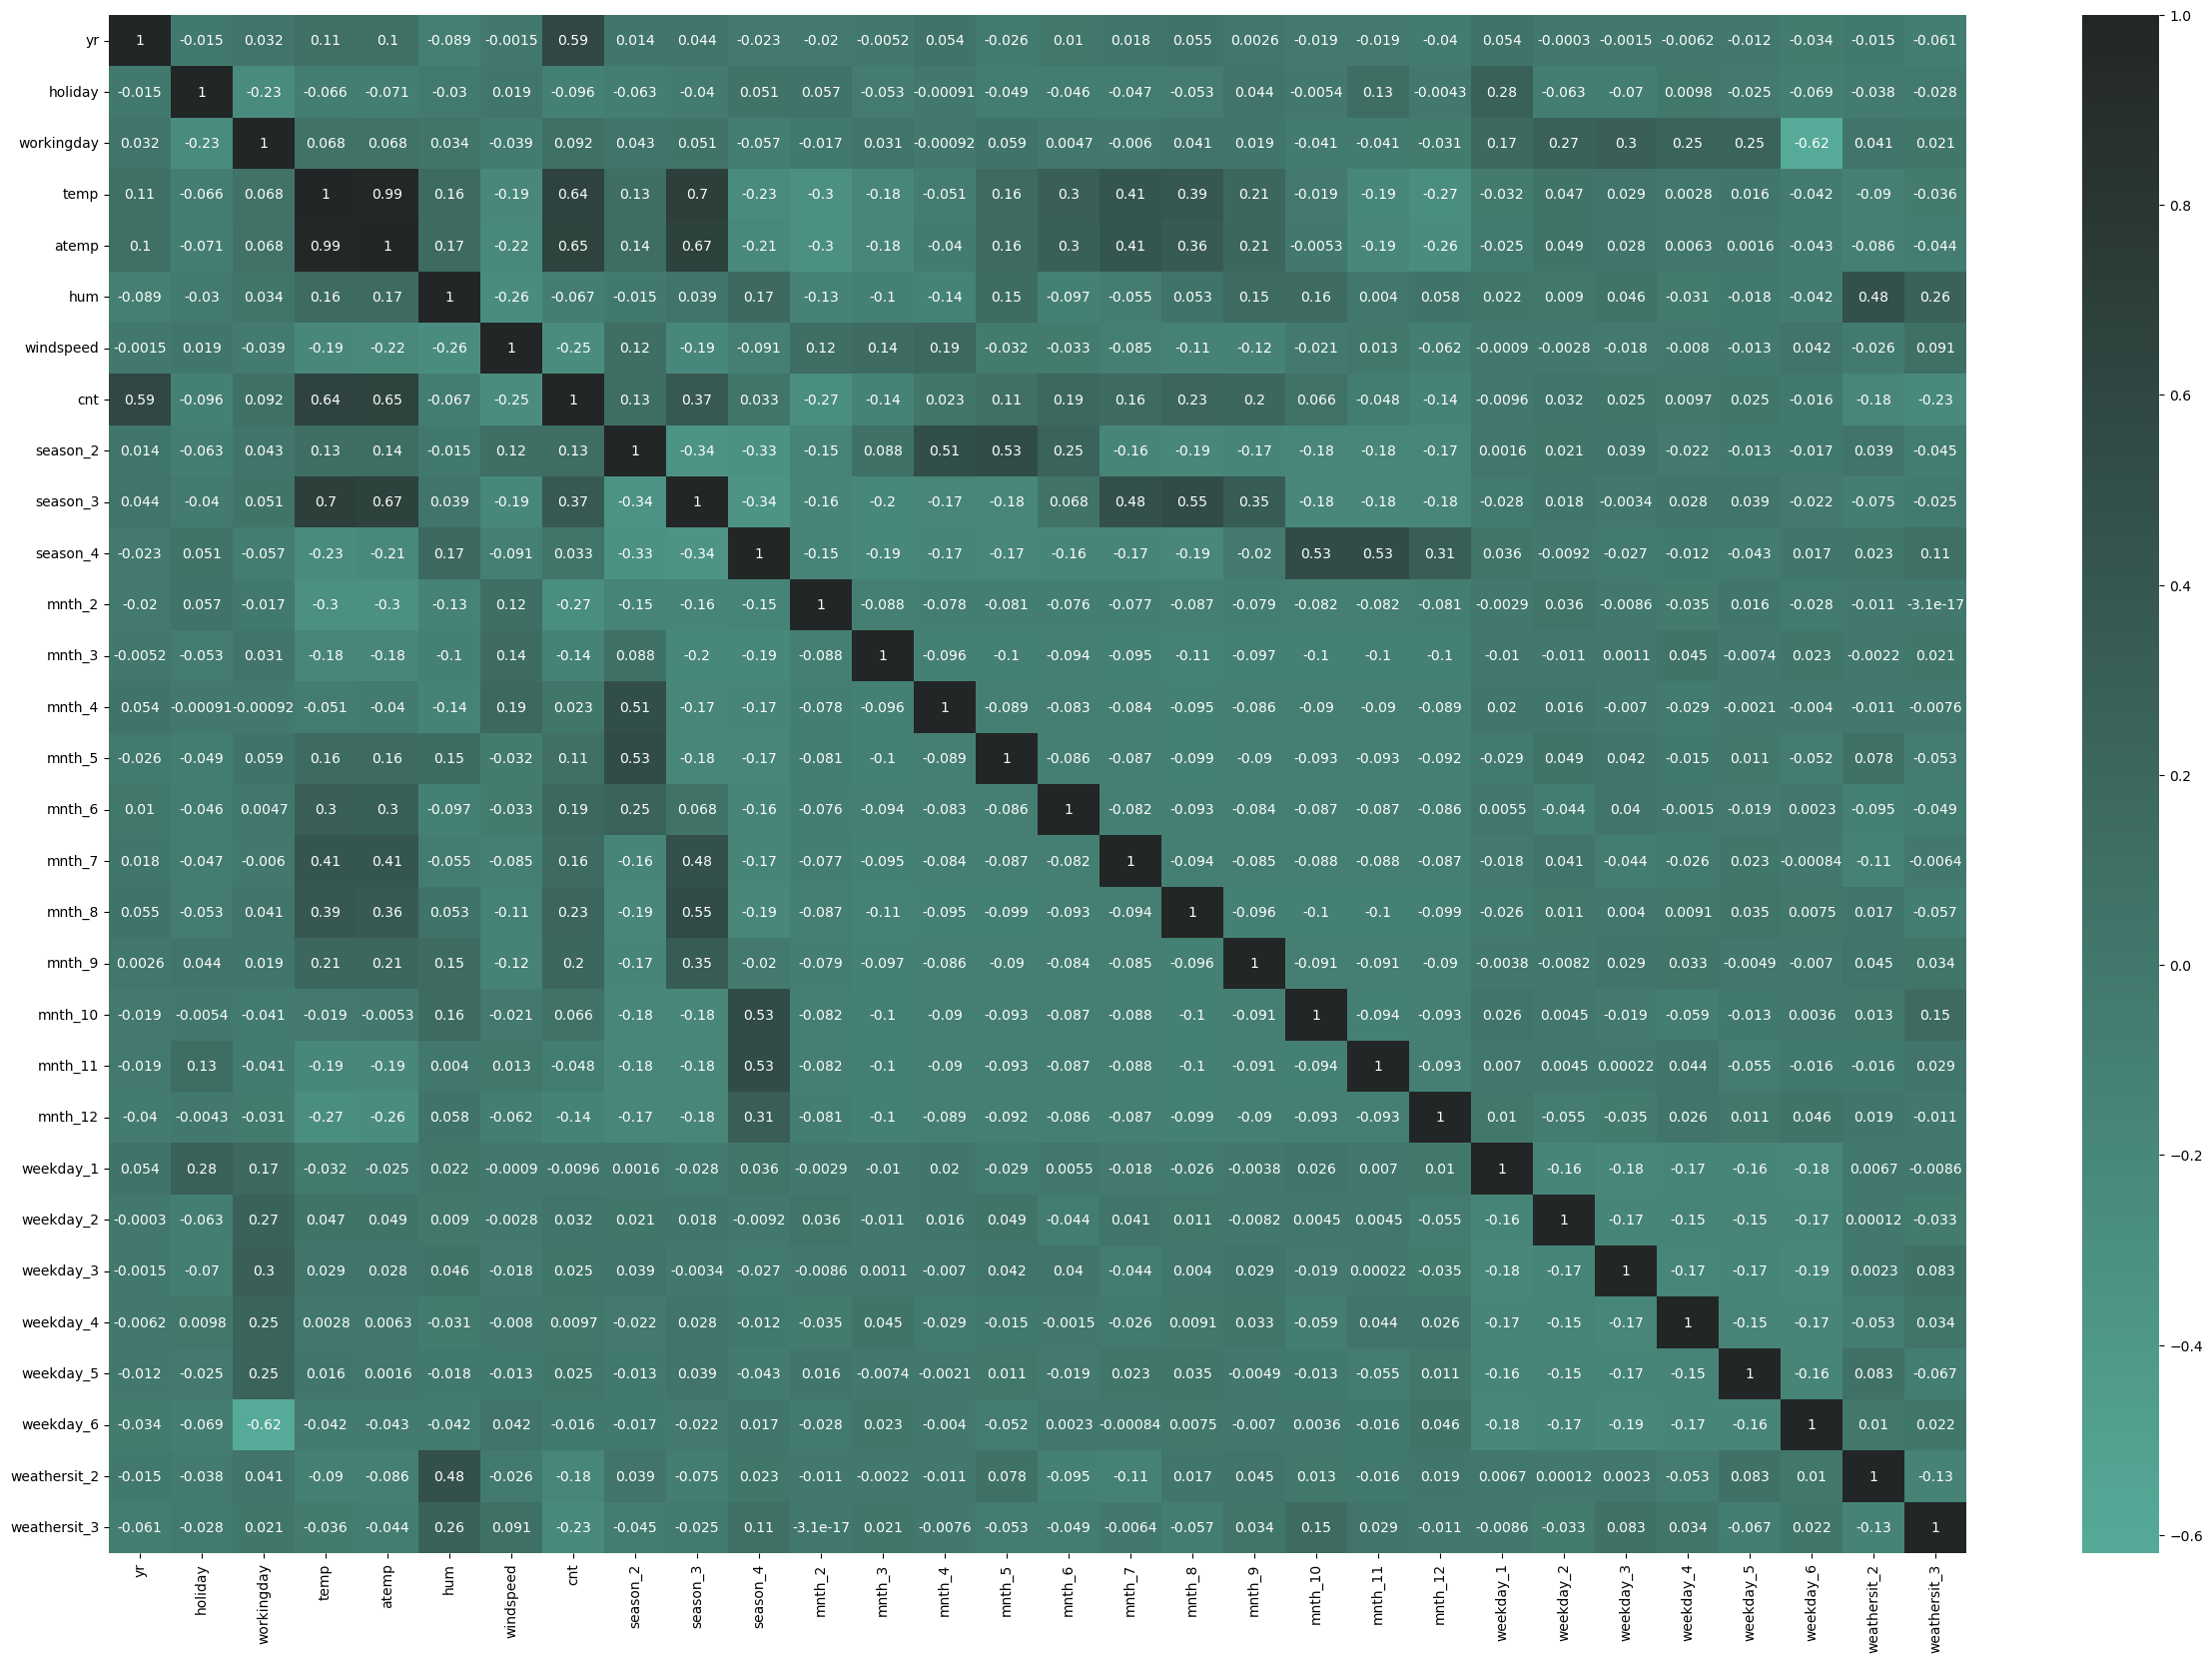

In [51]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True, cmap=sns.color_palette("dark:#5A9_r", as_cmap=True))
plt.show()

## Step 9: Assigning X and Y axis for training data


To build a linear regression model we need to have x and y axis.
- x axis = all predictors should be ther
- y axis = only target variable

### 9.1 Train data split

In [52]:
x_train = df_train.drop('cnt',axis=1) # dropping target column
y_train = df_train['cnt'] # assigning target column to y

In [53]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.459489,0.407940,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.650772,0.358969,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.542014,0.346298,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.361115,0.899312,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.369313,0.255612,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [54]:
x_train.shape

(510, 29)

In [55]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### 9.2 Test data split

In [56]:
x_test = df_test.drop('cnt',axis=1) # dropping target column
y_test = df_test['cnt'] # assigning target column to y

In [57]:
x_test.shape

(219, 29)

In [58]:
y_test.shape

(219,)

## Step 10: Feature Selection

- we are having 30 predictors or features in this data after data processing. It is bit time conusming to build a model for each and every feature.
- in sklearn library there is a specific module call RFE is there to select features best for the model automatically.
- here we will choose 15 best features to build the model.

In [59]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)  #running RFE
rfe = rfe.fit(x_train, y_train)  # 15 features selected anf=d fited to x and y

In [60]:
df_rfe = pd.DataFrame({'Predictors':x_train.columns,'Status':rfe.support_,'Rank':rfe.ranking_})
df_rfe.sort_values(by='Rank')

,Predictors,Status,Rank
0,yr,True,1
26,weekday_6,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_2,True,1
9,season_4,True,1
8,season_3,True,1
28,weathersit_3,True,1
6,windspeed,True,1


From the above list we will keep all those features which are ranked as 1.

In [61]:
final_features = x_train.columns[rfe.support_]

In [62]:
final_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

## Step 11: Model Building

we will use sequential backward selection technique

### Model 1

In [63]:
x_train_rfe = x_train[final_features]
x_train_sm = sm.add_constant(x_train_rfe)
regression = sm.OLS(y_train, x_train_sm)
lr_model_1 = regression.fit()

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.3
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.30e-191
Time:                        13:16:30   Log-Likelihood:                 519.51
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1618      0.024      6.844      0.000       0.115       0.208
yr               0.2299      0.008     28.693      0.000       0.214       0.246
holiday         -0.0543      0.027     -2.018      0.044      -0.107      -0.001
workingday       0.0446      0.012      3.870      0.000       0.022       0.067
temp             0.4961      0.034     14.745      0.000       0.430       0.562
hum             -0.1301      0.030     -4.315      0.000      -0.189      -0.071
windspeed       -0.1366      0.019     -7.120      0.000      -0.174      -0.099
season_2         0.1181      0.015      8.015      0.000       0.089       0.147
season_3         0.0299      0.022      1.363      0.173      -0.013       0.073
season_4         0.1436      0.013     10.727      0.000       0.117       0.170
mnth_8           0.0476      0.017      2.748      0.006       0.014       0.082
mnth_9           0.1178      0.017      6.882      0.000       0.084       0.151
mnth_10          0.0437      0.017      2.531      0.012       0.010       0.078
weekday_6        0.0525      0.015      3.612      0.000       0.024       0.081
weathersit_2    -0.0583      0.010     -5.553      0.000      -0.079      -0.038
weathersit_3    -0.2483      0.027     -9.359      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       76.935   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.393
Skew:                          -0.747   Prob(JB):                     2.51e-45
Kurtosis:                       5.726   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [64]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.05
4,hum,13.11
7,season_3,8.17
2,workingday,4.78
5,windspeed,3.82
6,season_2,3.43
8,season_4,2.85
13,weathersit_2,2.33
0,yr,2.04
9,mnth_8,1.85


<b>we will delete the feature season_3 as it is having highest p-value.

In [65]:
x_train_rfe.drop('season_3',axis=1, inplace=True)
x_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.459489,0.407940,0,1,0,0,1,0,0,0
576,1,0,1,0.815169,0.650772,0.358969,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.542014,0.346298,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.361115,0.899312,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.369313,0.255612,1,0,0,0,0,1,1,0


### Model 2

In [66]:
x_train_sm = sm.add_constant(x_train_rfe)
regression = sm.OLS(y_train, x_train_sm)
lr_model_2 = regression.fit()

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.81e-192
Time:                        13:16:30   Log-Likelihood:                 518.55
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1599      0.024      6.771      0.000       0.114       0.206
yr               0.2289      0.008     28.659      0.000       0.213       0.245
holiday         -0.0555      0.027     -2.064      0.040      -0.108      -0.003
workingday       0.0443      0.012      3.842      0.000       0.022       0.067
temp             0.5308      0.022     24.111      0.000       0.488       0.574
hum             -0.1361      0.030     -4.563      0.000      -0.195      -0.078
windspeed       -0.1390      0.019     -7.268      0.000      -0.177      -0.101
season_2         0.1044      0.011      9.705      0.000       0.083       0.126
season_4         0.1353      0.012     11.342      0.000       0.112       0.159
mnth_8           0.0562      0.016      3.491      0.001       0.025       0.088
mnth_9           0.1256      0.016      7.782      0.000       0.094       0.157
mnth_10          0.0405      0.017      2.365      0.018       0.007       0.074
weekday_6        0.0520      0.015      3.581      0.000       0.023       0.081
weathersit_2    -0.0572      0.010     -5.461      0.000      -0.078      -0.037
weathersit_3    -0.2442      0.026     -9.257      0.000      -0.296      -0.192
==============================================================================
Omnibus:                       71.295   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.375
Skew:                          -0.713   Prob(JB):                     1.12e-39
Kurtosis:                       5.531   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [67]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,12.44
3,temp,9.34
2,workingday,4.77
5,windspeed,3.73
12,weathersit_2,2.31
7,season_4,2.23
0,yr,2.02
6,season_2,1.83
11,weekday_6,1.83
10,mnth_10,1.62


<b>we will delete the feature holiday as it is having highest p value.

In [68]:
x_train_rfe.drop('holiday',axis=1, inplace=True)
x_train_rfe.head()

,yr,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,1,0.509887,0.459489,0.407940,0,1,0,0,1,0,0,0
576,1,1,0.815169,0.650772,0.358969,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.542014,0.346298,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.361115,0.899312,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.369313,0.255612,1,0,0,0,0,1,1,0


### Model 3

In [69]:
x_train_sm = sm.add_constant(x_train_rfe)
regression = sm.OLS(y_train, x_train_sm)
lr_model_3 = regression.fit()

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.24e-192
Time:                        13:16:30   Log-Likelihood:                 516.37
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1505      0.023      6.473      0.000       0.105       0.196
yr               0.2291      0.008     28.588      0.000       0.213       0.245
workingday       0.0526      0.011      4.844      0.000       0.031       0.074
temp             0.5324      0.022     24.117      0.000       0.489       0.576
hum             -0.1354      0.030     -4.523      0.000      -0.194      -0.077
windspeed       -0.1397      0.019     -7.282      0.000      -0.177      -0.102
season_2         0.1051      0.011      9.745      0.000       0.084       0.126
season_4         0.1345      0.012     11.249      0.000       0.111       0.158
mnth_8           0.0566      0.016      3.502      0.001       0.025       0.088
mnth_9           0.1238      0.016      7.659      0.000       0.092       0.156
mnth_10          0.0417      0.017      2.431      0.015       0.008       0.075
weekday_6        0.0604      0.014      4.315      0.000       0.033       0.088
weathersit_2    -0.0569      0.011     -5.416      0.000      -0.078      -0.036
weathersit_3    -0.2435      0.026     -9.198      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       76.502   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.960
Skew:                          -0.748   Prob(JB):                     2.30e-44
Kurtosis:                       5.686   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.21
2,temp,9.32
1,workingday,4.34
4,windspeed,3.64
11,weathersit_2,2.30
6,season_4,2.22
0,yr,2.02
5,season_2,1.83
10,weekday_6,1.74
9,mnth_10,1.61


<b>In Model 3 we will delete the feature mnth_10 which is having higher P value

In [71]:
x_train_rfe.drop('mnth_10',axis=1, inplace=True)
x_train_rfe.head()

,yr,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
653,1,1,0.509887,0.459489,0.407940,0,1,0,0,0,0,0
576,1,1,0.815169,0.650772,0.358969,0,0,0,0,0,0,0
426,1,0,0.442393,0.542014,0.346298,0,0,0,0,1,1,0
728,1,0,0.245101,0.361115,0.899312,0,0,0,0,0,0,0
482,1,0,0.395666,0.369313,0.255612,1,0,0,0,1,1,0


### Model 4

In [72]:
x_train_sm = sm.add_constant(x_train_rfe)
regression = sm.OLS(y_train, x_train_sm)
lr_model_4 = regression.fit()

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.95e-192
Time:                        13:16:30   Log-Likelihood:                 513.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -945.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1442      0.023      6.210      0.000       0.099       0.190
yr               0.2288      0.008     28.420      0.000       0.213       0.245
workingday       0.0519      0.011      4.759      0.000       0.030       0.073
temp             0.5419      0.022     24.825      0.000       0.499       0.585
hum             -0.1319      0.030     -4.389      0.000      -0.191      -0.073
windspeed       -0.1372      0.019     -7.129      0.000      -0.175      -0.099
season_2         0.1032      0.011      9.545      0.000       0.082       0.124
season_4         0.1485      0.011     14.099      0.000       0.128       0.169
mnth_8           0.0529      0.016      3.272      0.001       0.021       0.085
mnth_9           0.1176      0.016      7.330      0.000       0.086       0.149
weekday_6        0.0598      0.014      4.253      0.000       0.032       0.087
weathersit_2    -0.0566      0.011     -5.356      0.000      -0.077      -0.036
weathersit_3    -0.2379      0.027     -8.977      0.000      -0.290      -0.186
==============================================================================
Omnibus:                       67.722   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.961
Skew:                          -0.683   Prob(JB):                     3.37e-37
Kurtosis:                       5.457   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [73]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.21
2,temp,9.12
1,workingday,4.32
4,windspeed,3.63
10,weathersit_2,2.30
0,yr,2.02
5,season_2,1.82
6,season_4,1.73
9,weekday_6,1.73
7,mnth_8,1.58


<b>we will delete the feature hum as it is having highest VIF in model 4

In [74]:
x_train_rfe.drop('hum',axis=1, inplace=True)
x_train_rfe.head()

,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
653,1,1,0.509887,0.407940,0,1,0,0,0,0,0
576,1,1,0.815169,0.358969,0,0,0,0,0,0,0
426,1,0,0.442393,0.346298,0,0,0,0,1,1,0
728,1,0,0.245101,0.899312,0,0,0,0,0,0,0
482,1,0,0.395666,0.255612,1,0,0,0,1,1,0


### Model 5

In [75]:
x_train_sm = sm.add_constant(x_train_rfe)
regression = sm.OLS(y_train, x_train_sm)
lr_model_5 = regression.fit()

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.3
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.08e-189
Time:                        13:16:30   Log-Likelihood:                 503.65
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     498   BIC:                            -932.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0815      0.019      4.372      0.000       0.045       0.118
yr               0.2327      0.008     28.561      0.000       0.217       0.249
workingday       0.0548      0.011      4.941      0.000       0.033       0.077
temp             0.5210      0.022     24.021      0.000       0.478       0.564
windspeed       -0.1135      0.019     -6.034      0.000      -0.150      -0.077
season_2         0.1003      0.011      9.134      0.000       0.079       0.122
season_4         0.1394      0.011     13.257      0.000       0.119       0.160
mnth_8           0.0516      0.016      3.132      0.002       0.019       0.084
mnth_9           0.1118      0.016      6.869      0.000       0.080       0.144
weekday_6        0.0649      0.014      4.545      0.000       0.037       0.093
weathersit_2    -0.0836      0.009     -9.587      0.000      -0.101      -0.067
weathersit_3    -0.2864      0.025    -11.676      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       65.493   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.956
Skew:                          -0.671   Prob(JB):                     5.02e-35
Kurtosis:                       5.373   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [76]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
1,workingday,4.04
3,windspeed,3.57
0,yr,2.02
4,season_2,1.81
8,weekday_6,1.69
6,mnth_8,1.58
9,weathersit_2,1.54
5,season_4,1.51
7,mnth_9,1.30


### Checking Parameter for our  5th Model

In [77]:
lr_model_5.params

const           0.081494
yr              0.232726
workingday      0.054756
temp            0.520959
windspeed      -0.113530
season_2        0.100338
season_4        0.139378
mnth_8          0.051574
mnth_9          0.111807
weekday_6       0.064883
weathersit_2   -0.083649
weathersit_3   -0.286364
dtype: float64

#### Observation: 

We are choosing this Model as a final Model because:
- All the features are having <b>low P-value.</b>
- This model is having <b>very low multicolinearity</b> which will not overfit the prediction.
- In the VIF chart we are having <b>Temperature as highest VIF</b> which is almost 6.11 hence this feature is having a great effect on the Target variable.

## Step 12: Hypothesis Testing

According to the model we are doing Hypothesis Testing here.

- Null Hypothesis (H0) : M1=M2=M3=.....=Mn=0 (All the coefficients should be zero)
- Alternative Hypothesis (H1) : Mi!=0 (Any one of the all coefficients should not be zero)

Hence, we are <b>rejecting the Null Hypothesis</b> because all Coefficients are not accurately 0.0

### Equation for this linear model:

# <font color='red'>y ('cnt' Target Variable)</font> = <font color='blue'>0.081494</font> + (yr x <font color='green'>0.232726</font>) + (workingday x <font color='green'>0.054756</font>) + (temp x <font color='green'>0.520959</font>) - (windspeed x <font color='green'>0.113530</font>) + (season_2 x <font color='green'>0.100338</font>) + (season_4 x <font color='green'>0.139378</font>) + (mnth_8 x <font color='green'>0.051574</font>) + (mnth_9 x <font color='green'>0.111807</font>) + (weekday_6 x <font color='green'>0.064883</font>) - (weathersit_2 x <font color='green'>0.083649</font>) - (weathersit_3 x <font color='green'>0.286364</font>)

- <font color='red'> Red </font> = Target variable
- <font color='blue'> Blue </font> = Constant
- <font color='green'> Green </font> = Co-efficients
- <font color='black'> Black </font> = Features

#                                     <font color='Red'>Model Evaluation</font>

## Step 13: Residual Analysis

In [78]:
# predicting train data
y_train_pred = lr_model_5.predict(x_train_sm)
# calculating error between predicted data and actual data in terms of residual
residual = y_train_pred - y_train
residual

653   -0.136571
576   -0.074765
426    0.021353
728    0.135713
482    0.089926
         ...   
526   -0.003698
578    0.008996
53     0.006640
350   -0.047656
79     0.075958
Length: 510, dtype: float64

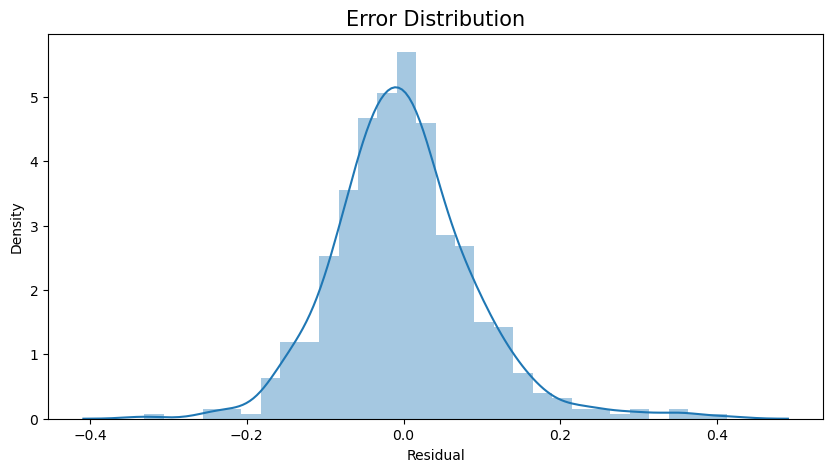

In [79]:
# plotting a distribution graph for all residual or error Points
plt.figure(figsize=(10,5))
plt.xlabel('Residual', fontdict={'fontsize':10})
plt.title('Error Distribution', fontdict={'fontsize':15})
sns.distplot(residual)
plt.show()

<b> From the above graph it is confirmed that our errors are distributed well through out the data hence giving us the nOrmal distribution model. Also, our Model 5 is the best fit model for this data. </b>

## Step 14: Checking homoscedasticity

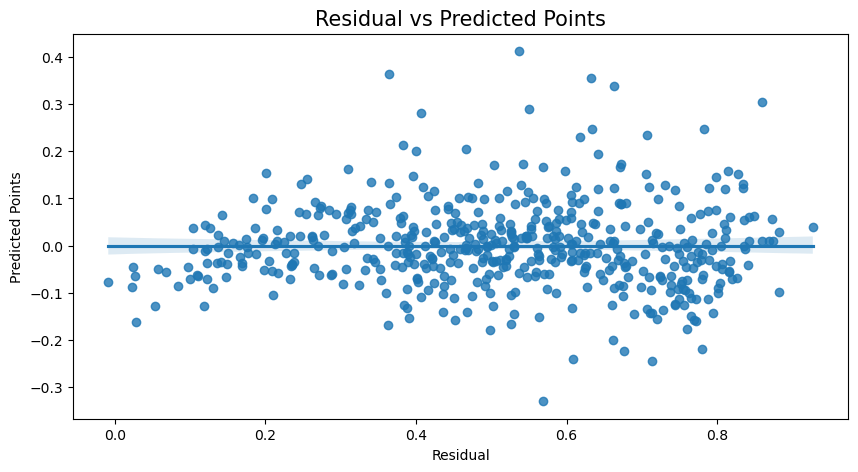

In [80]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual, ax=ax)
plt.title('Residual vs Predicted Points', fontdict={'fontsize':15})
plt.xlabel('Residual', fontdict={'fontsize':10})
plt.ylabel('Predicted Points', fontdict={'fontsize':10})
plt.show()

from the above graph it is clear that there is no relation between residuals and predicted values which describes the <b>homoscedasticity</b>

## Step 15: Checking Linearity

### 15.1 Linearity between Target and Temperature


we are checking the linearity of Target variable with Temperature which is our important feature in this model.

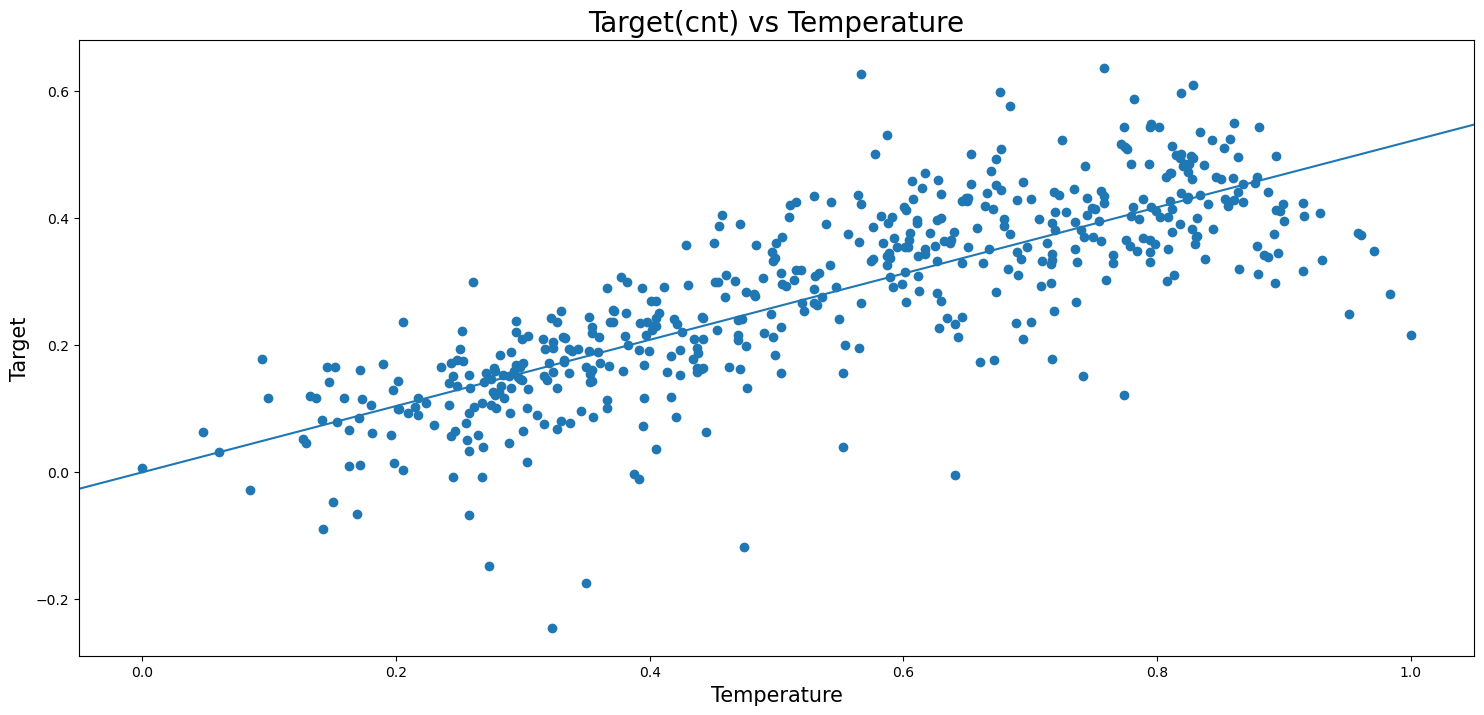

In [89]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr_model_5, 'temp',ax=ax)
plt.title('Target(cnt) vs Temperature', fontdict={'fontsize':20})
plt.xlabel('Temperature', fontdict={'fontsize':15})
plt.ylabel('Target', fontdict={'fontsize':15})
plt.show()

### 15.2 Target vs Windspeed

Windspeed will give us a best negatively correlated relation with Target variable.

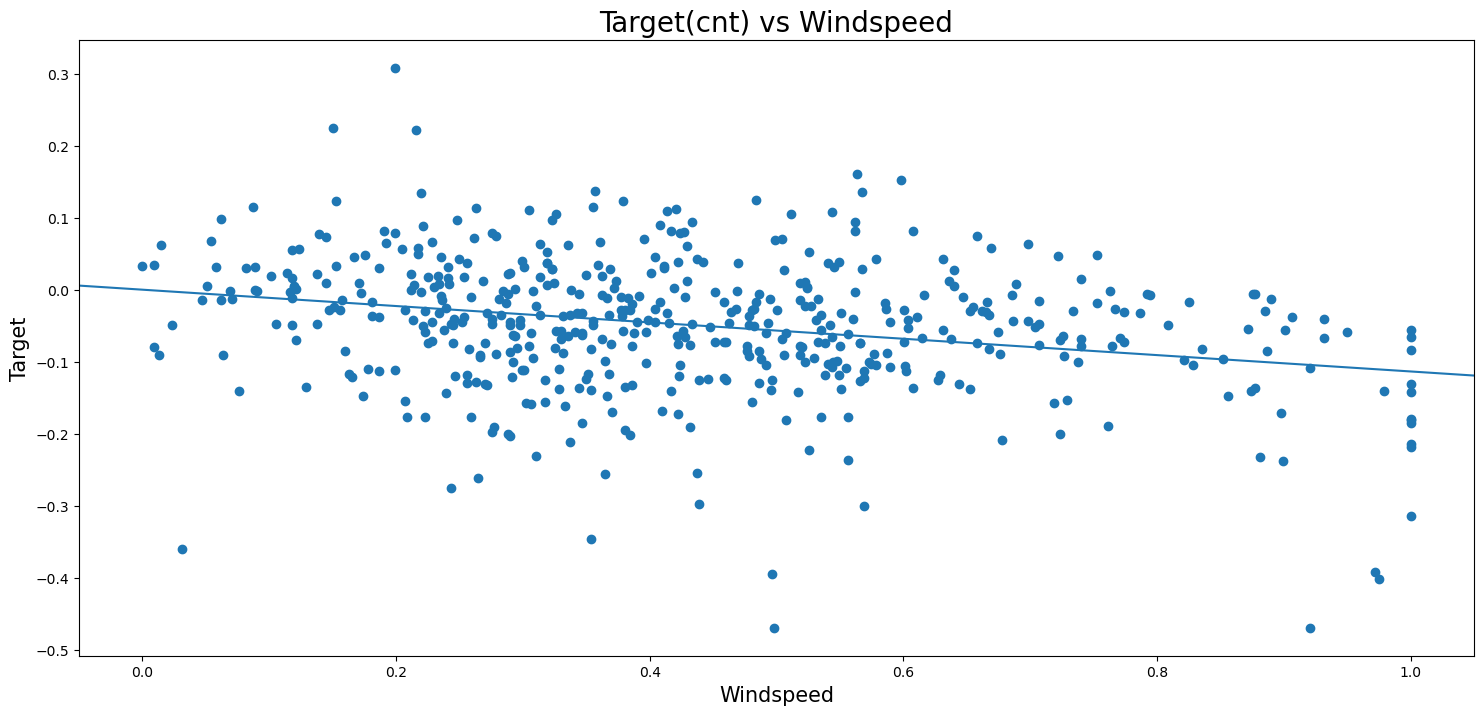

In [92]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr_model_5, 'windspeed',ax=ax)
plt.title('Target(cnt) vs Windspeed', fontdict={'fontsize':20})
plt.xlabel('Windspeed', fontdict={'fontsize':15})
plt.ylabel('Target', fontdict={'fontsize':15})
plt.show()

### 15.3 Absence of Multicolinearity

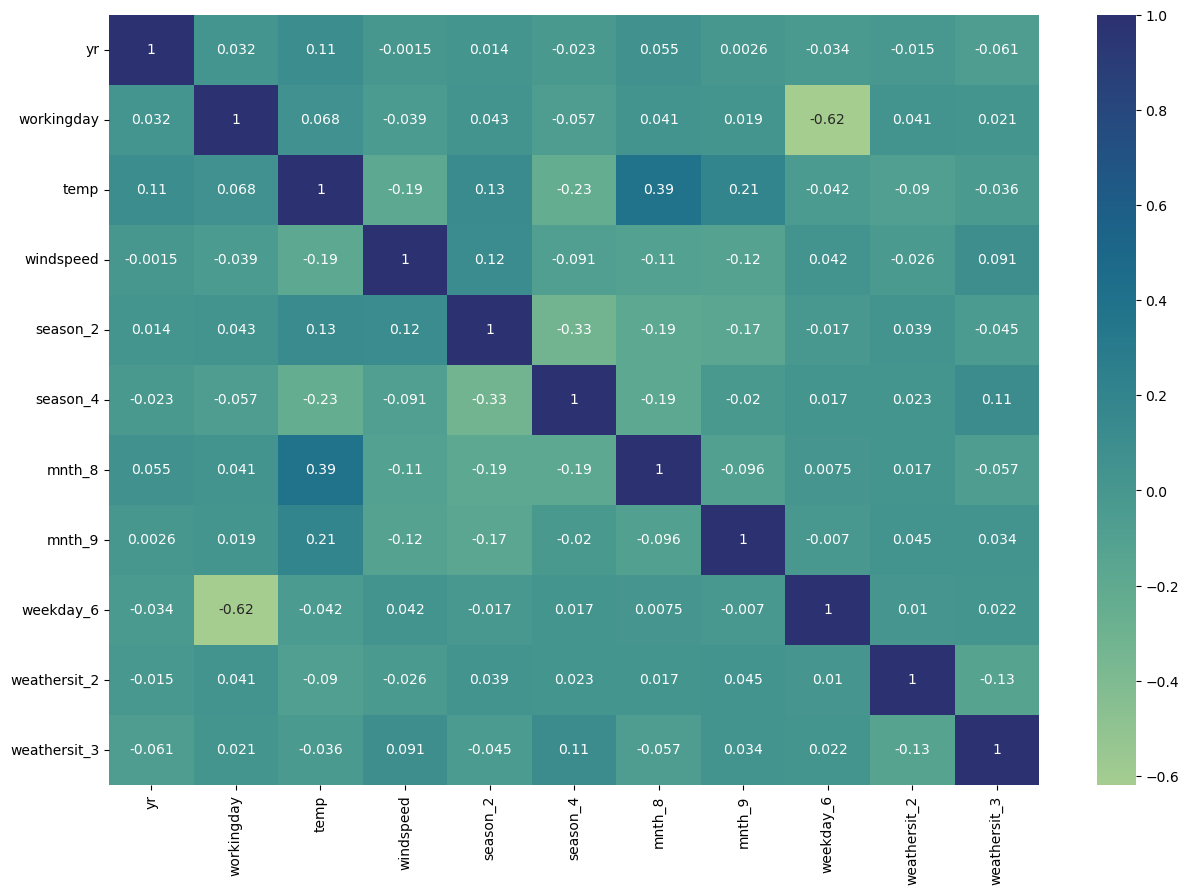

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train_rfe.corr(),annot=True,cmap='crest',linecolor='black')
plt.show()

From the above Heatmap we can conclude that <b>Multicolinearity</b> is absent for the data.

## Step 16: Prediction score for Train Data

### 16.1 Predicted value vs Actual points.

This will gives us a scatterplot which will derrive a relationship between actual and predicted point

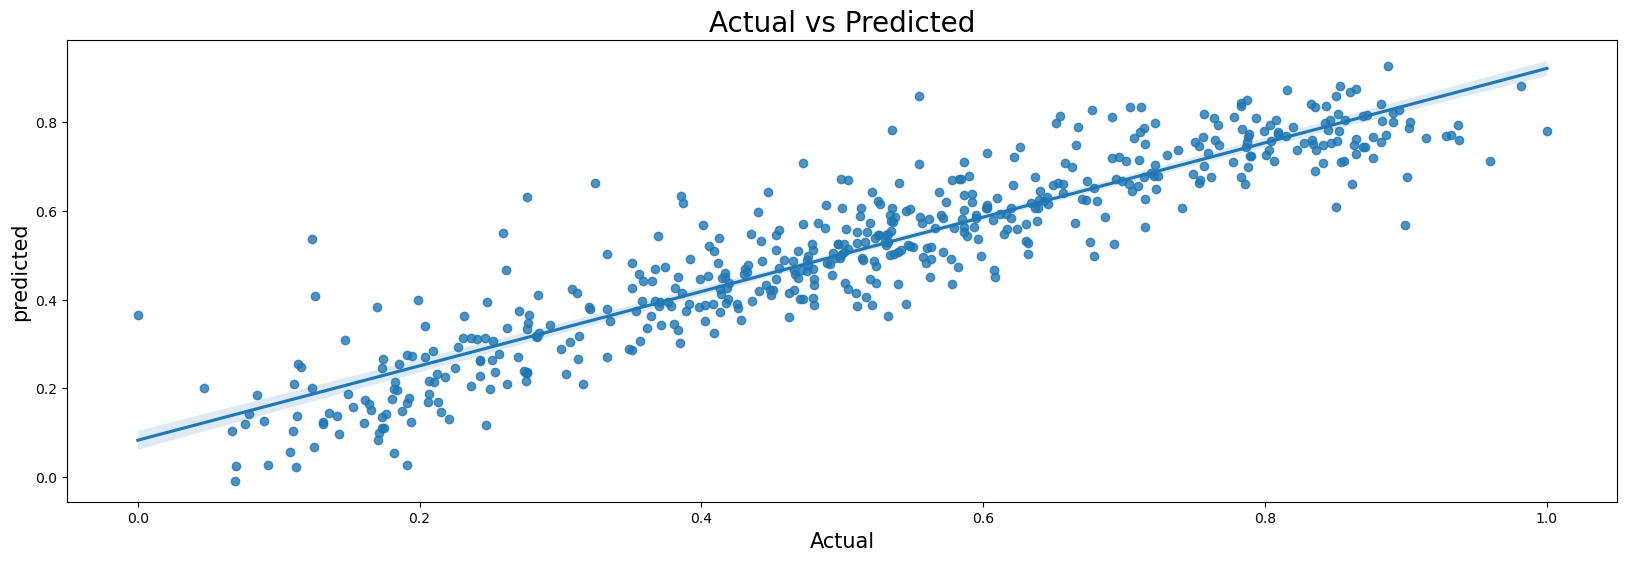

In [96]:
plt.figure(figsize=(20,6))
sns.regplot(x=y_train,y=y_train_pred)
plt.title('Actual vs Predicted', fontdict={'fontsize':20})
plt.xlabel('Actual', fontdict={'fontsize':15})
plt.ylabel('predicted', fontdict={'fontsize':15})
plt.show()

#### Observation:
From the above graph, we can say that residuals are equal distributed across predicted value. This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.
This proves Homoscedasticity of Error Terms.

### 16.2 R^2 Value

The coefficient of determination (R²) measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.

The lowest possible value of R² is 0 and the highest possible value is 1. Put simply, the better a model is at making predictions, the closer its R² will be to 1.

In [143]:
r2_train = r2_score(y_train,y_train_pred)
r2_train

0.838632990391477

Here The R^2 value of Train data in 0.8386 which is much closer to value 1. Hence, we can say that the Model is trained well for the data.

### 16.3 Adjusted R^2 value

The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not. To understand adjusted R-squared, an understanding of R-squared is required.

In [150]:
shape_train = x_train.shape
row_train = shape_train[0]
col_train = shape_train[1]
Adjusted_r2_train = 1-(1-r2_train)*(row_train-1)/(row_train-col_train-1)
Adjusted_r2_train

0.828883733560962

## Step 17: Prediction on Test Data


- Scaling is done on test data on step: 8
- Spliting is done on Test data on Step: 9.2

Here we will do:
- Feature Selection
- Prediction on Test Data
- Error Distribution
- R^2 value
- Adjusted R^2 Value

### 17.1 Selecting the features based on train data

In [114]:
x_test_new = x_test[x_train_rfe.columns]
x_test_new = sm.add_constant(x_test_new)
x_test_new.head()

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
184,1.0,0,0,0.831783,0.114218,0,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.208487,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.453254,0,1,0,0,0,1,0
221,1.0,0,1,0.881625,0.460528,0,0,1,0,0,0,0
152,1.0,0,1,0.817246,0.728846,1,0,0,0,0,0,0


In [115]:
x_test_new.shape

(219, 12)

In [116]:
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_8        219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


### 17.2 Prediction on Test Data

In [124]:
y_pred_test = lr_model_5.predict(x_test_new)

In [125]:
y_pred_test

184    0.418203
535    0.915214
299    0.407234
221    0.594831
152    0.579594
         ...   
400    0.320498
702    0.735219
127    0.475708
640    0.805108
72     0.277657
Length: 219, dtype: float64

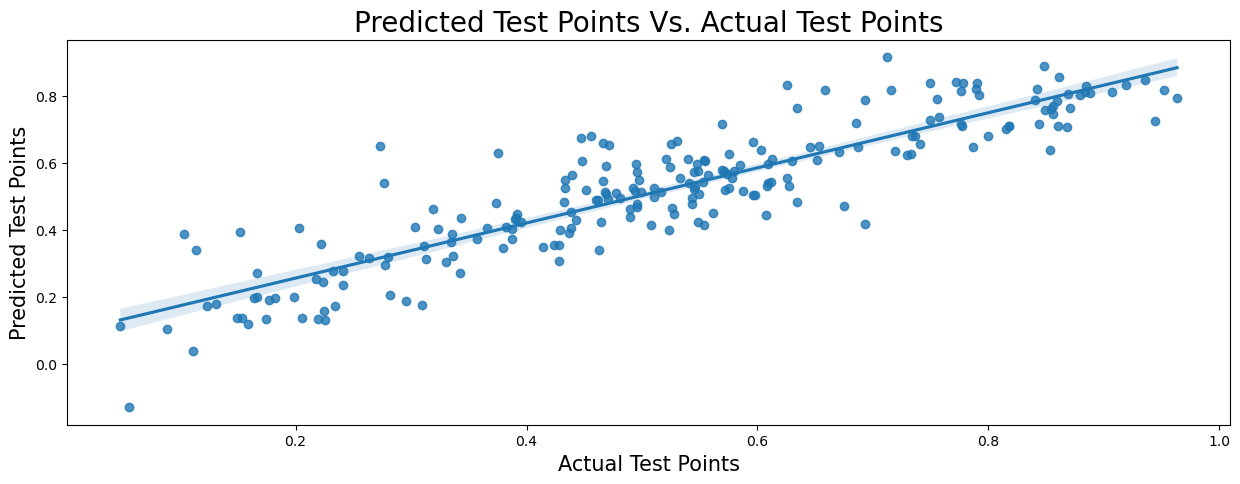

In [126]:
plt.figure(figsize=(15,5))
sns.regplot(x=y_test, y=y_pred_test)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

### 17.3 Error Distribution

In [127]:
residuals = y_test - y_pred_test
residual

653   -0.136571
576   -0.074765
426    0.021353
728    0.135713
482    0.089926
         ...   
526   -0.003698
578    0.008996
53     0.006640
350   -0.047656
79     0.075958
Length: 510, dtype: float64

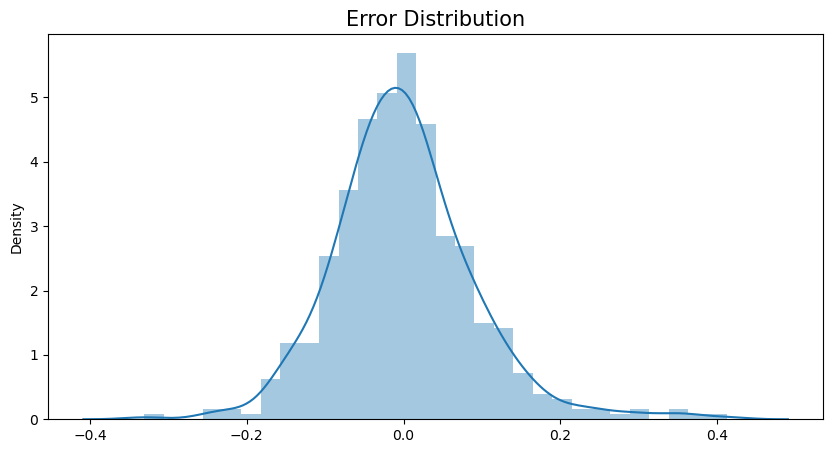

In [128]:
plt.figure(figsize=(10,5))
sns.distplot(residual)
plt.title('Error Distribution', fontdict={'fontsize':15})
plt.show()

- From the above graph we can see that the errors are distributed equally through out the data hence providing a <b>Normal Distribution curve</b>.
- It means that the model which we choose to predict the data on Test data is perfectly fited with this business problem.

### 17.4 R^2 value on Test Data

The coefficient of determination (R²) measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.

The lowest possible value of R² is 0 and the highest possible value is 1. Put simply, the better a model is at making predictions, the closer its R² will be to 1.

In [136]:
r2 = r2_score(y_test,y_pred_test)
r2

0.7967307476141641

Here The R^2 value of Train data in 0.8386 which is much closer to value 1. Hence, we can say that the Model is trained well for the data.

## Step 18: Adjusted R^2 and Mean Square Error

In [131]:
shape = x_test_new.shape
shape

(219, 12)

In [132]:
row = shape[0]
row

219

In [133]:
col = shape[1]
col

12

In [139]:
# Adjusted R^2:
Adjusted_r2 = 1-(1-r2)*(row-1)/(row-col-1)
Adjusted_r2

0.7848898202907173

In [142]:
# MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_pred_test)
mse

0.00965443741416919

## Step 19: Final Report on R^2 and Adjusted R^2

- R^2 for Train data = 0.8386 (step 16.2)
- Adjusted R^2 for Train data = 0.8288 (step 16.3)
- R^2 for Test data = 0.7967
- Adjusted R^2 for Test data = 0.7848
- We can say that the model is perfect fit for these dataset as difference between <b>R^2 value</b> for Train and Test are very small and same applied for <b>Adjusted R^2 value</b> as well.
- Same if we compare between R^2 and Adjusted R^2 of both Test and Train data, we can see that the difference is not much between R^2 and Adjusted R^2.

In [154]:
lr_model_5.params.sort_values(ascending=False)

temp            0.520959
yr              0.232726
season_4        0.139378
mnth_9          0.111807
season_2        0.100338
const           0.081494
weekday_6       0.064883
workingday      0.054756
mnth_8          0.051574
weathersit_2   -0.083649
windspeed      -0.113530
weathersit_3   -0.286364
dtype: float64

### Best Fitted Line

# <font color='red'>y ('cnt' Target Variable)</font> = <font color='blue'>0.081494</font> + (yr x <font color='green'>0.232726</font>) + (workingday x <font color='green'>0.054756</font>) + (temp x <font color='green'>0.520959</font>) - (windspeed x <font color='green'>0.113530</font>) + (season_2 x <font color='green'>0.100338</font>) + (season_4 x <font color='green'>0.139378</font>) + (mnth_8 x <font color='green'>0.051574</font>) + (mnth_9 x <font color='green'>0.111807</font>) + (weekday_6 x <font color='green'>0.064883</font>) - (weathersit_2 x <font color='green'>0.083649</font>) - (weathersit_3 x <font color='green'>0.286364</font>)

- <font color='red'> Red </font> = Target variable
- <font color='blue'> Blue </font> = Constant
- <font color='green'> Green </font> = Co-efficients
- <font color='black'> Black </font> = Features

## Step 20: Answer for our major 2 Business Problem.


### Conclusion: 
We can conclude that the model Model-5 fit isn't by chance, and has descent predictive power.

#### <font color='red'>1. Which variables are significant in predicting the demand for shared bikes?</font>


<font color='indigo'>As per the model 5 parameters, we can choose top 5 important features which are having an effect on our Target columns.</font>

<font color='indigo'>
    <ol>
        <li>Temperature (temp)</li>
        <li>Year (yr)</li>
        <li>Season Winter (season_4)</li>
        <li>Month October (mnth_9)</li>
        <li>Season Summer (season_2)</li>
    </ol>
</font>

#### <font color='red'>2. How well those variables describe the bike demands?</font>


<font color='indigo'> Now here we will discuss top 3 features which are important to this model.</font>
<font color='indigo'>
    <ol>
        <li><b>temp</b> = Target variable is <b>positively correlated</b> with the temp feature. A unit increase in temp(Temperature) variable <b>increase</b> the bike hire numbers by <b>0.520959</b> units.</li>
        <li><b>yr</b> = <b>Positively correlated</b> with Target variable. A unit increase in yr(Year) variable increase the bike hire numbers by <b>0.232726</b> units.</li>
        <li><b>season_4</b> = this is also having <b>positive relationship</b> with Target variable. A unit increase in season_4 variable increase the bike hire numbers by <b>0.139378</b> units.</li>
    </ol>
</font>
Highest priority should be on the features which are mentioned above.
    
After that you can check with other 2 features which are mnth_9 and season_2.
- For <b>mnth_9</b> A unit increase in this variablle <b>increase</b> the bike hire numbers by <b>0.111807</b> units.
- For <b>season_2</b> A unit increase in this variablle <b>increase</b> the bike hire numbers by <b>0.100338</b> units.